### author by yangshichen
### 注意：脚本仅供参考，使用前请仔细阅读

### 加载R包

In [1]:
library(Seurat)
library(ggplot2)
library(future)
library(tidyverse)
library(harmony)
library(SeuratDisk)
library(pheatmap)
library(ggpubr)
library(ggchicklet)
library(ggsci)
library(magrittr)
library(ggh4x)
library(rstatix)
library(ggsignif)
library(ggnewscale)
library(patchwork)
library(gapminder)
library(ggprism)
library(dplyr)
library(ggplotify)

Attaching SeuratObject

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
载入需要的程序包：Rcpp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


载入程序包：‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



载入程序包：‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [4]:
setwd('/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/GeneScore/数据导出/0904/')
data <- as.data.frame(read.csv("CD4.csv",check.names = F,header = T))
data$stage <- factor(data$stage,levels = c("HDs",'IRs',"INRs"))

In [5]:
colnames(data) <- gsub("-", "_", colnames(data))

In [6]:
data

cellbarcode,CCL4,CCR10,CD69,CD8A,CD8B,CISH,CSRNP1,CST3,DUSP1,⋯,S100A8,S100A9,SOX4,TMEM156,TYMP,TYROBP,YBX3,sample,celltype_L3,stage
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
HD-H134-1-CELL4_N1,-0.2265649,-0.1231742,-0.87637734,-0.2770017,-0.2440341,-0.3126138,-0.288465,-0.2464307,-0.9973743,⋯,-0.326695,2.2446072,-0.1294512,-0.316231,-0.3193186,-0.3650804,-0.2169238,HD-H134,CD4_Treg-FOXP3,HDs
HD-H134-1-CELL24_N1,-0.2265649,-0.1231742,-0.87637734,-0.2770017,-0.2440341,-0.3126138,-0.288465,-0.2464307,-0.9973743,⋯,-0.326695,2.4546435,-0.1294512,-0.316231,-0.3193186,-0.3650804,-0.2169238,HD-H134,CD4_Naive_T-CCR7,HDs
HD-H134-1-CELL55_N1,-0.2265649,-0.1231742,0.04257987,-0.2770017,-0.2440341,-0.3126138,-0.288465,2.4214756,0.2814259,⋯,-0.326695,-0.5037412,-0.1294512,-0.316231,-0.3193186,-0.3650804,-0.2169238,HD-H134,CD4_Treg-FOXP3,HDs
HD-H134-1-CELL85_N1,-0.2265649,-0.1231742,-0.87637734,-0.2770017,-0.2440341,2.7887616,-0.288465,-0.2464307,0.4176868,⋯,-0.326695,-0.5037412,-0.1294512,-0.316231,-0.3193186,-0.3650804,6.0924450,HD-H134,CD4_Tcm-CXCR5,HDs
HD-H134-1-CELL101_N2,-0.2265649,-0.1231742,-0.87637734,3.1610804,-0.2440341,2.5976500,-0.288465,-0.2464307,0.7985024,⋯,3.713002,1.5736071,-0.1294512,-0.316231,2.8304846,-0.3650804,-0.2169238,HD-H134,CD4_Th22-CCR10,HDs
HD-H134-1-CELL103_N1,-0.2265649,-0.1231742,0.90429610,-0.2770017,-0.2440341,-0.3126138,-0.288465,-0.2464307,-0.9973743,⋯,-0.326695,-0.5037412,-0.1294512,-0.316231,-0.3193186,4.3193200,-0.2169238,HD-H134,CD4_Naive_T-CCR7,HDs
HD-H134-1-CELL104_N1,-0.2265649,-0.1231742,-0.87637734,-0.2770017,4.9998302,-0.3126138,-0.288465,-0.2464307,-0.9973743,⋯,-0.326695,-0.5037412,-0.1294512,-0.316231,-0.3193186,-0.3650804,-0.2169238,HD-H134,CD4_Naive_T-CCR7,HDs
HD-H134-1-CELL172_N1,-0.2265649,-0.1231742,-0.87637734,-0.2770017,-0.2440341,-0.3126138,-0.288465,-0.2464307,-0.9973743,⋯,-0.326695,-0.5037412,-0.1294512,-0.316231,-0.3193186,-0.3650804,-0.2169238,HD-H134,CD4_Treg-FOXP3,HDs
HD-H134-1-CELL175_N2,-0.2265649,-0.1231742,-0.87637734,-0.2770017,-0.2440341,2.6465447,3.254049,-0.2464307,1.1149862,⋯,-0.326695,-0.5037412,-0.1294512,-0.316231,-0.3193186,-0.3650804,4.2870226,HD-H134,CD4_Th1-GZMK,HDs


### 基因热图（样本）

In [13]:
##data
data_sub <- data[,c(-1,-28)]
grouped_data <- data_sub %>%
  group_by(stage, celltype_L3) %>%
  summarize(across(everything(), mean))
sort_data <- as.data.frame(grouped_data[order(grouped_data$celltype_L3),])
rownames(sort_data) <- paste0(sort_data$celltype_L3,"_",sort_data$stage)
sort_data <- t(as.matrix(sort_data[,c(-1,-2)]))

`summarise()` has grouped output by 'stage'. You can override using the
`.groups` argument.


In [14]:
sort_data

,CD4_Naive_T-CCR7_HDs,CD4_Naive_T-CCR7_IRs,CD4_Naive_T-CCR7_INRs,CD4_Naive_T-SOX4_HDs,CD4_Naive_T-SOX4_IRs,CD4_Naive_T-SOX4_INRs,CD4_Tcm-CXCR5_HDs,CD4_Tcm-CXCR5_IRs,CD4_Tcm-CXCR5_INRs,CD4_Tcm-GPR183_HDs,⋯,CD4_Th17-RORC_INRs,CD4_Th22-CCR10_HDs,CD4_Th22-CCR10_IRs,CD4_Th22-CCR10_INRs,CD4_Treg-FCRL3_HDs,CD4_Treg-FCRL3_IRs,CD4_Treg-FCRL3_INRs,CD4_Treg-FOXP3_HDs,CD4_Treg-FOXP3_IRs,CD4_Treg-FOXP3_INRs
BATF,-0.1053395342,-0.087177146,-0.083394003,-0.15922541,-0.14183811,-0.130054226,-0.016929262,0.0237287871,0.0370308334,-0.08518224,⋯,0.106603596,0.1614554817,0.236444153,0.239103361,0.052137963,0.105795315,0.150449698,0.381890729,0.483254776,0.50816046
CCL5,-0.2105233227,-0.075174930,-0.041543706,-0.25176986,-0.09620832,-0.143461959,-0.103129563,-0.0122286807,0.0816388746,-0.19996639,⋯,0.193608155,-0.1101349879,0.014662237,0.074085834,-0.166850866,-0.045339810,0.044714641,-0.151533565,-0.035369963,0.05603055
DDIT3,-0.0246863478,-0.033282612,-0.039454667,-0.04909799,-0.09303075,-0.069542740,-0.069983473,-0.0751019282,-0.0862485390,0.01946562,⋯,0.026172541,0.0086214666,0.118410281,0.128838675,0.116527495,0.105578325,0.178078866,0.006893972,0.073202040,0.15073730
DDX60,0.0084576905,0.039505482,0.057068825,-0.06999890,-0.04270618,-0.031778054,-0.031068148,-0.0243094672,-0.0265280892,-0.05267314,⋯,0.080807738,-0.0474245274,-0.011093626,0.001165137,-0.057355982,-0.043101079,-0.038843305,-0.053020214,-0.001582774,0.04384388
GBP1,-0.0427908812,-0.011506770,0.070003226,-0.22312749,-0.20247474,-0.186087755,-0.092969981,-0.0516911926,0.0137759807,-0.08543015,⋯,0.096467506,0.0156599087,0.041245233,0.134535383,-0.071621180,-0.031466725,0.029215528,0.279568257,0.333374609,0.49394864
HERC5,-0.0511616704,-0.052918164,-0.044941627,-0.11204722,-0.12208165,-0.099470131,-0.012348862,-0.0335869898,-0.0471898479,-0.02640109,⋯,0.044073124,0.0034102059,0.016729851,0.048828029,0.059443456,0.055075875,0.106904000,0.237460249,0.347394986,0.47625391
HLA_DRB1,-0.1374921560,-0.209115786,-0.155686236,-0.16651313,-0.23121589,-0.214690652,-0.075068527,-0.1817218805,-0.0770740787,-0.09921504,⋯,0.008425318,0.4440864747,0.300566306,0.497751139,0.112766166,-0.030842004,0.140541671,1.204027354,0.981653420,1.22953342
IFI44L,-0.0836013084,-0.042311032,0.183529500,-0.18565571,-0.17201535,-0.110289996,-0.070311437,-0.0008089284,0.1167157646,-0.05710553,⋯,0.393825950,-0.1428268954,-0.065619642,0.008653455,-0.191905864,-0.159693529,-0.069597258,-0.194837075,-0.135882288,-0.03602050
IFIH1,-0.0197248120,0.013510503,0.007246728,-0.11045591,-0.09127158,-0.067853172,-0.002250264,0.0135601216,0.0051601939,-0.05204184,⋯,0.091615138,-0.0320269109,0.005278397,0.001828876,-0.029415587,-0.004957517,0.021443874,-0.004792417,0.068724741,0.09512886
IFIT3,-0.0260418212,-0.009426352,0.077494672,-0.12295372,-0.12611481,-0.093872782,-0.084070349,-0.0758553842,-0.0398133876,-0.03072439,⋯,0.048821090,-0.0263248677,0.011022130,0.096093324,-0.028846293,-0.019273300,0.037938676,0.070917798,0.154555776,0.30037014


In [21]:
grouped_data <- data[,c(-1)]
#grouped_data <- grouped_data %>%
#  group_by(stage,celltype_L3) %>%
#  summarise(across(everything(), mean))
grouped_data

BATF,CCL5,DDIT3,DDX60,GBP1,HERC5,HLA_DRB1,IFI44L,IFIH1,IFIT3,⋯,OASL,PMAIP1,PTGER4,S100A8,S100A9,TBX21,TNF,sample,celltype_L3,stage
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
4.8043365,-0.7200837,-0.2517664,-0.2487783,-0.4186814,-0.2088249,-0.4326952,-0.2882855,-0.2484941,-0.1659193,⋯,-0.1121871,-0.247156,-0.5125051,-0.326695,2.2446072,-0.2268332,-0.1281776,HD-H134,CD4_Treg-FOXP3,HDs
-0.2566505,1.4957119,-0.2517664,-0.2487783,-0.4186814,-0.2088249,-0.4326952,-0.2882855,-0.2484941,-0.1659193,⋯,-0.1121871,-0.247156,-0.5125051,-0.326695,2.4546435,-0.2268332,-0.1281776,HD-H134,CD4_Naive_T-CCR7,HDs
-0.2566505,0.3056570,2.2949780,-0.2487783,1.7498944,-0.2088249,3.1313944,-0.2882855,-0.2484941,-0.1659193,⋯,-0.1121871,-0.247156,-0.5125051,-0.326695,-0.5037412,-0.2268332,-0.1281776,HD-H134,CD4_Treg-FOXP3,HDs
-0.2566505,0.9379996,-0.2517664,-0.2487783,2.7887225,-0.2088249,-0.4326952,-0.2882855,-0.2484941,-0.1659193,⋯,-0.1121871,-0.247156,-0.5125051,-0.326695,-0.5037412,-0.2268332,-0.1281776,HD-H134,CD4_Tcm-CXCR5,HDs
-0.2566505,-0.7200837,-0.2517664,-0.2487783,-0.4186814,-0.2088249,1.8977183,-0.2882855,-0.2484941,-0.1659193,⋯,-0.1121871,-0.247156,2.0876830,3.713002,1.5736071,-0.2268332,-0.1281776,HD-H134,CD4_Th22-CCR10,HDs
-0.2566505,-0.7200837,-0.2517664,-0.2487783,-0.4186814,-0.2088249,-0.4326952,-0.2882855,-0.2484941,-0.1659193,⋯,-0.1121871,-0.247156,-0.5125051,-0.326695,-0.5037412,-0.2268332,-0.1281776,HD-H134,CD4_Naive_T-CCR7,HDs
-0.2566505,-0.7200837,-0.2517664,-0.2487783,-0.4186814,-0.2088249,-0.4326952,-0.2882855,-0.2484941,-0.1659193,⋯,-0.1121871,-0.247156,-0.5125051,-0.326695,-0.5037412,-0.2268332,-0.1281776,HD-H134,CD4_Naive_T-CCR7,HDs
-0.2566505,-0.7200837,-0.2517664,-0.2487783,2.6838840,-0.2088249,-0.4326952,-0.2882855,-0.2484941,-0.1659193,⋯,-0.1121871,-0.247156,-0.5125051,-0.326695,-0.5037412,5.8088665,-0.1281776,HD-H134,CD4_Treg-FOXP3,HDs
-0.2566505,-0.7200837,-0.2517664,-0.2487783,-0.4186814,-0.2088249,-0.4326952,3.7796688,-0.2484941,-0.1659193,⋯,-0.1121871,-0.247156,-0.5125051,-0.326695,-0.5037412,-0.2268332,-0.1281776,HD-H134,CD4_Th1-GZMK,HDs


In [35]:
##pvalue
p_val <- data.frame()
for (gene in colnames(grouped_data)[1:26]) {
  df_p_val <- grouped_data %>% group_by(celltype_L3) %>%
    wilcox_test(as.formula(paste0(gene, " ~ stage"))) %>%
    adjust_pvalue(p.col = "p", method = "BH") %>%
    add_significance(p.col = "p.adj",cutpoints = c(0,0.001, 0.01, 0.05, 1),symbols = c("***", "**", "*", "ns"))
  df_p_val <- df_p_val[,-c(5,6,7)]
  colnames(df_p_val) <- c("celltype_L3","gene","group1","group2","p","p.adj","p.adj.signif")
  p_val <- rbind(p_val,df_p_val)
}

p_val_sub <- p_val[,-c(5,6)]
df_pivot <- spread(p_val_sub, key = gene, value = p.adj.signif) #按照pathway分列

cols_to_replace <- c(colnames(df_pivot)[4:29]) #符号替换
df_pivot[df_pivot$group1 == "IRs" & df_pivot$group2 == "INRs", cols_to_replace] <- 
  lapply(df_pivot[df_pivot$group1 == "IRs" & df_pivot$group2 == "INRs", cols_to_replace], function(x) gsub("\\*", "+", x))
df_pivot[df_pivot$group1 == "IRs" & df_pivot$group2 == "INRs", cols_to_replace] <- 
  lapply(df_pivot[df_pivot$group1 == "IRs" & df_pivot$group2 == "INRs", cols_to_replace], function(x) gsub("\\*\\*", "++", x))
df_pivot[df_pivot$group1 == "IRs" & df_pivot$group2 == "INRs", cols_to_replace] <- 
  lapply(df_pivot[df_pivot$group1 == "IRs" & df_pivot$group2 == "INRs", cols_to_replace], function(x) gsub("\\*\\*\\*", "+++", x))

df_pivot$group <- paste0(df_pivot$group2,"_",df_pivot$group1)
df_pivot <- df_pivot[,-c(2,3)]

In [36]:
df_pivot

celltype_L3,BATF,CCL5,DDIT3,DDX60,GBP1,HERC5,HLA_DRB1,IFI44L,IFIH1,⋯,OAS2,OAS3,OASL,PMAIP1,PTGER4,S100A8,S100A9,TBX21,TNF,group
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CD4_Naive_T-CCR7,***,***,ns,***,***,ns,**,***,***,⋯,***,***,***,***,***,***,***,***,***,INRs_HDs
CD4_Naive_T-CCR7,***,***,ns,***,***,ns,***,***,***,⋯,***,***,*,***,***,***,***,***,***,IRs_HDs
CD4_Naive_T-CCR7,ns,+++,ns,ns,+++,ns,+++,+++,ns,⋯,+,+++,+,+++,+++,+++,+++,ns,+++,INRs_IRs
CD4_Naive_T-SOX4,*,***,ns,ns,*,ns,***,***,*,⋯,ns,ns,ns,***,***,ns,***,ns,***,INRs_HDs
CD4_Naive_T-SOX4,*,***,***,*,*,ns,***,*,ns,⋯,ns,ns,ns,*,***,***,***,**,*,IRs_HDs
CD4_Naive_T-SOX4,ns,++,ns,ns,ns,ns,ns,+++,ns,⋯,ns,ns,ns,+,+++,+++,+++,ns,++,INRs_IRs
CD4_Tcm-CXCR5,***,***,ns,ns,***,ns,ns,***,ns,⋯,***,***,*,***,***,***,***,***,***,INRs_HDs
CD4_Tcm-CXCR5,***,***,ns,ns,***,ns,***,***,*,⋯,***,**,ns,***,***,***,***,**,***,IRs_HDs
CD4_Tcm-CXCR5,ns,+++,ns,ns,+++,ns,+++,+++,ns,⋯,++,ns,ns,+++,ns,+++,+++,+++,+++,INRs_IRs


In [45]:
#INRs组p
df_INRs <- df_pivot[df_pivot$group != 'IRs_HDs', ]
df_INRs <- df_INRs %>%
  group_by(celltype_L3) %>%
  summarize(group = "INRs",
            across(colnames(df_INRs)[2:27], ~paste0(.x, collapse = "\n")))

#IRs组p
df_IRs <- df_pivot[df_pivot$group == 'IRs_HDs', ]
df_IRs$group <- "IRs"

#HDs组p
df_HDs <- df_pivot[df_pivot$group == 'IRs_HDs', ]
df_HDs <- as.data.frame(lapply(df_HDs, function(x) gsub("\\*\\*\\*", "ns", x)))
df_HDs <- as.data.frame(lapply(df_HDs, function(x) gsub("\\*\\*", "ns", x)))
df_HDs <- as.data.frame(lapply(df_HDs, function(x) gsub("\\*", "ns", x)))
df_HDs$group <- "HDs"

#合并p
df <- rbind(df_HDs,df_IRs,df_INRs)
df <- as.data.frame(df[order(df$celltype_L3), ])
rownames(df) <- paste0(df$celltype_L3,"_",df$group)
df <- t(df[,-c(1,28)])
df <- df[match(rownames(sort_data), rownames(df)), ]
df[df == "ns" | df == "ns\nns"] <- ""
df[df == "***\nns"] <- "***"
df[df == "**\nns"] <- "**"
df[df == "*\nns"] <- "*"
df[df == "ns\n+"] <- "+"
df[df == "ns\n++"] <- "++"
df[df == "ns\n+++"] <- "+++"

In [46]:
df

,CD4_Naive_T-CCR7_HDs,CD4_Naive_T-CCR7_IRs,CD4_Naive_T-CCR7_INRs,CD4_Naive_T-SOX4_HDs,CD4_Naive_T-SOX4_IRs,CD4_Naive_T-SOX4_INRs,CD4_Tcm-CXCR5_HDs,CD4_Tcm-CXCR5_IRs,CD4_Tcm-CXCR5_INRs,CD4_Tcm-GPR183_HDs,⋯,CD4_Th17-RORC_INRs,CD4_Th22-CCR10_HDs,CD4_Th22-CCR10_IRs,CD4_Th22-CCR10_INRs,CD4_Treg-FCRL3_HDs,CD4_Treg-FCRL3_IRs,CD4_Treg-FCRL3_INRs,CD4_Treg-FOXP3_HDs,CD4_Treg-FOXP3_IRs,CD4_Treg-FOXP3_INRs
BATF,,***,***,,*,*,,***,***,,⋯,***,,***,***,,***,***,,***,***
CCL5,,***,*** +++,,***,*** ++,,***,*** +++,,⋯,*** +++,,***,*** +++,,***,*** +++,,***,*** +++
DDIT3,,,,,***,,,,,,⋯,***,,***,***,,,*** ++,,***,*** +++
DDX60,,***,***,,*,,,,,,⋯,***,,***,***,,,,,***,*** ++
GBP1,,***,*** +++,,*,*,,***,*** +++,,⋯,*** ++,,*,*** +++,,***,*** ++,,**,*** +++
HERC5,,,,,,,,,,,⋯,*,,,**,,,*,,***,*** +++
HLA_DRB1,,***,** +++,,***,***,,***,+++,,⋯,* +++,,***,** +++,,***,+++,,***,+++
IFI44L,,***,*** +++,,*,*** +++,,***,*** +++,,⋯,*** ++,,***,*** +++,,***,*** +++,,***,*** +++
IFIH1,,***,***,,,*,,*,,,⋯,*,,**,**,,,**,,***,***
IFIT3,,***,*** +++,,,** ++,,,*** +++,,⋯,*** +,,***,*** +++,,,*** +,,***,*** +++


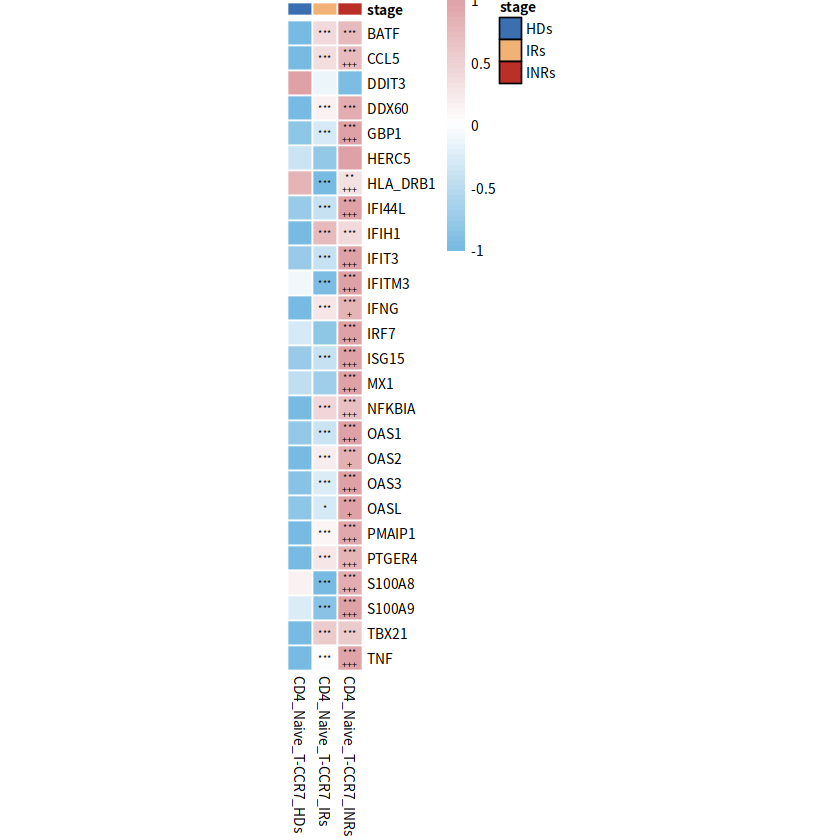

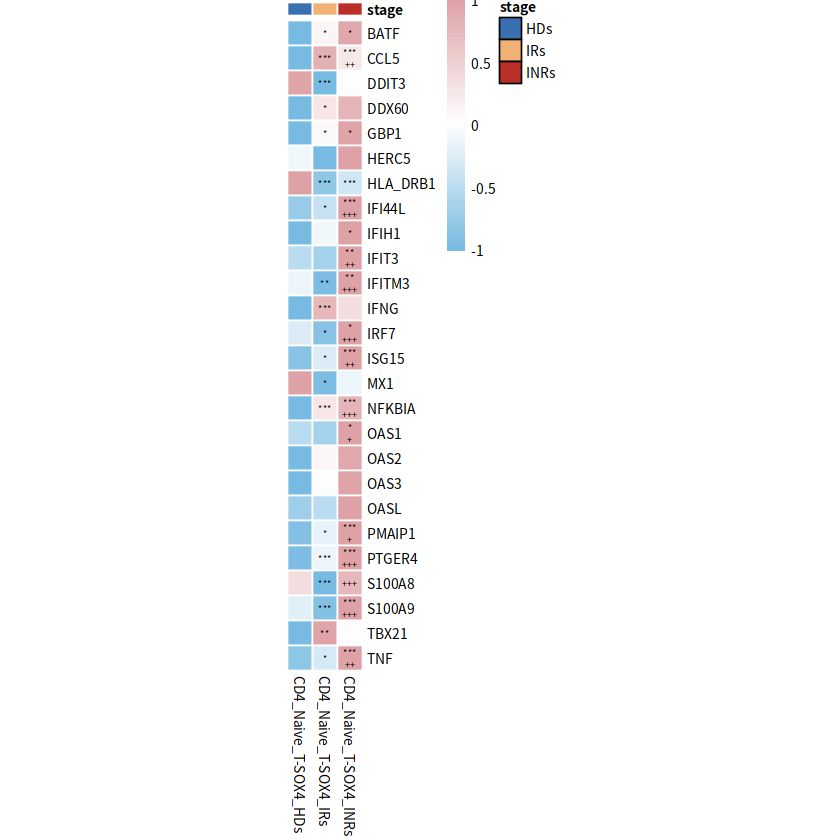

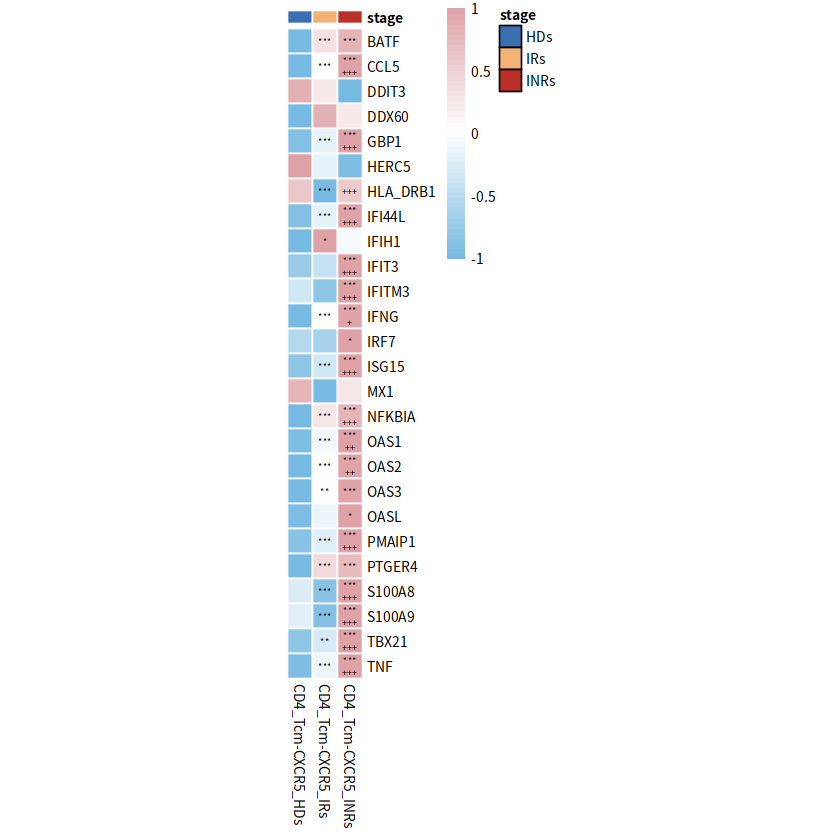

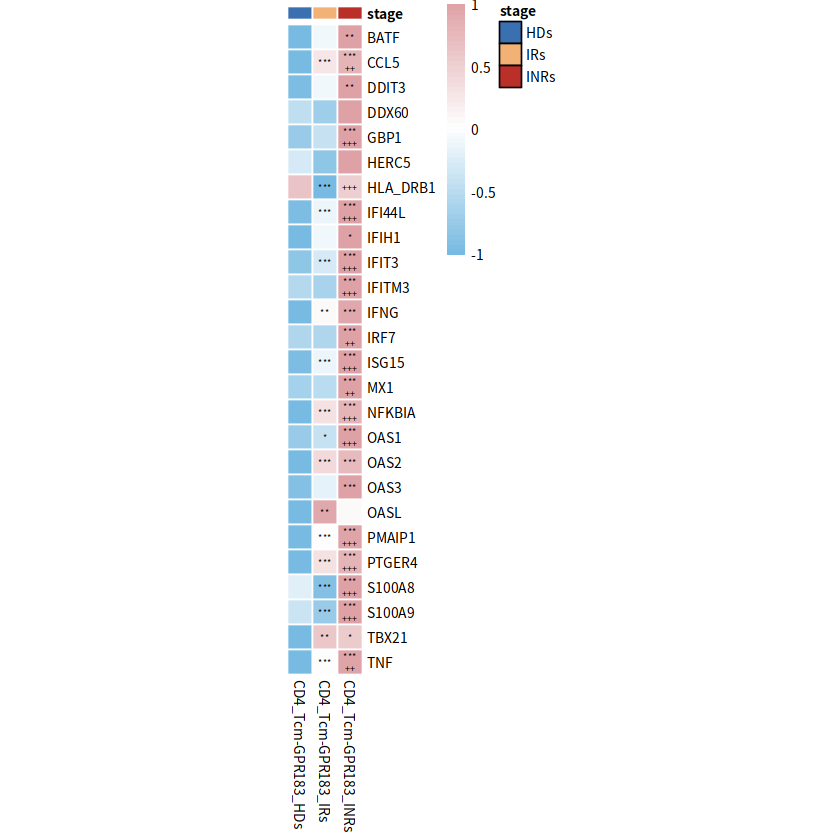

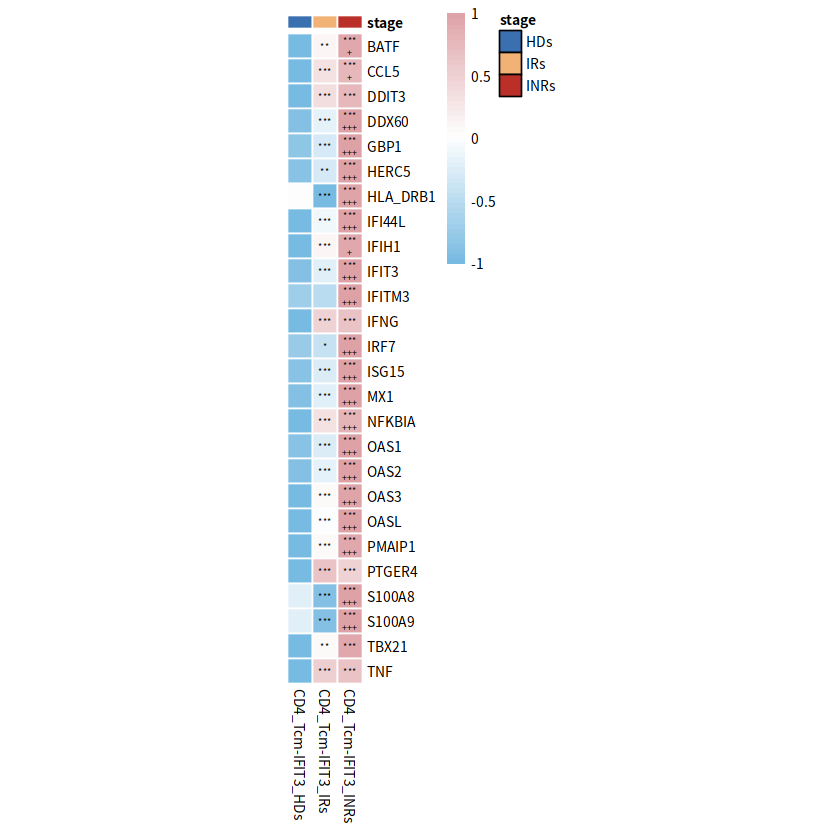

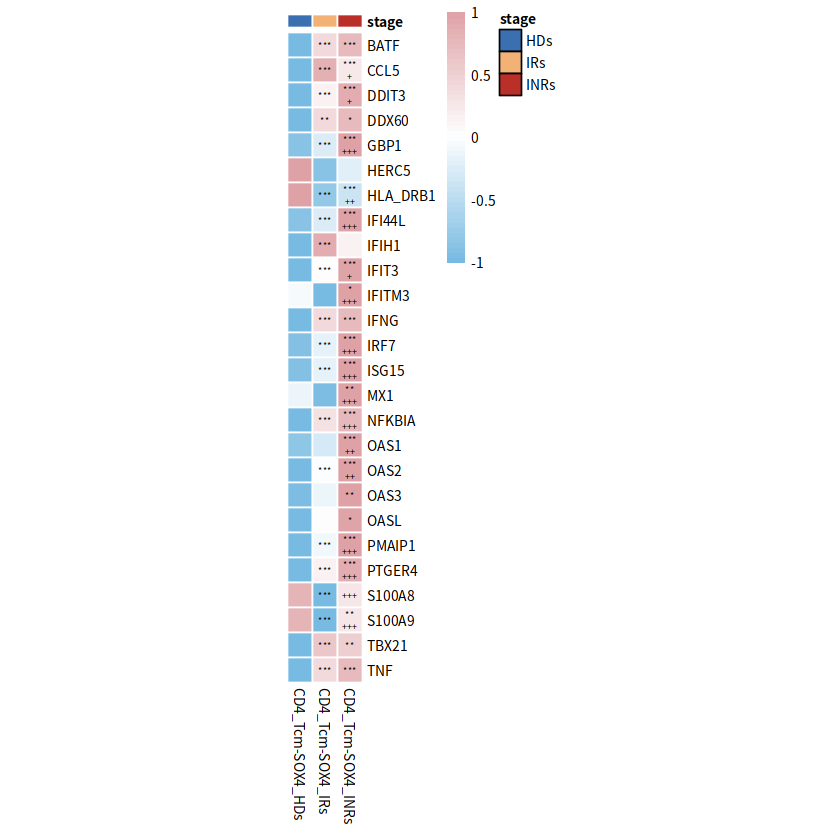

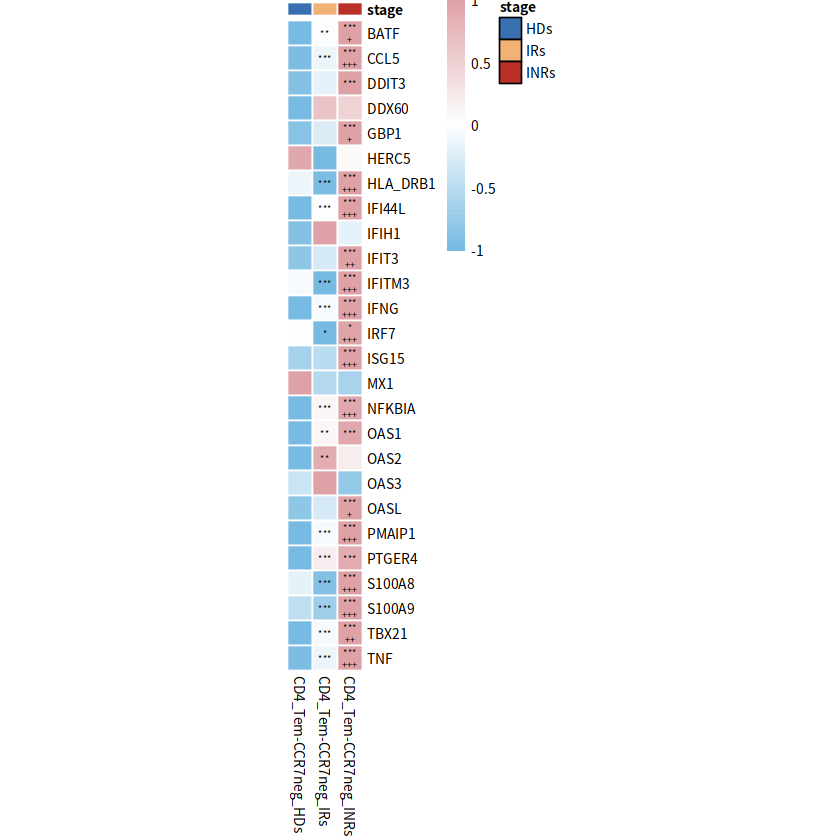

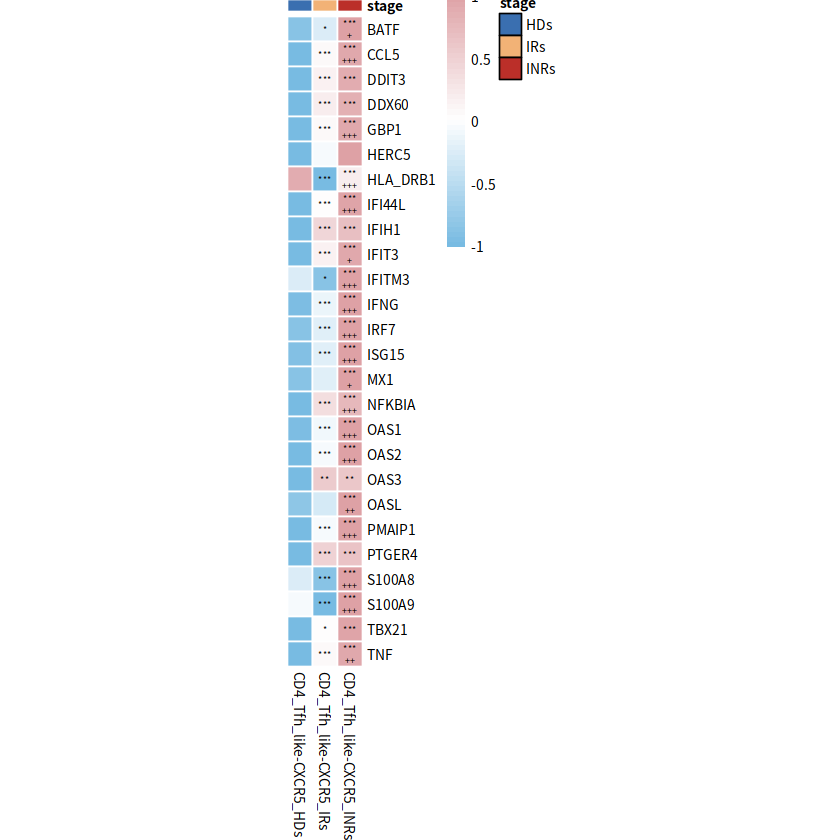

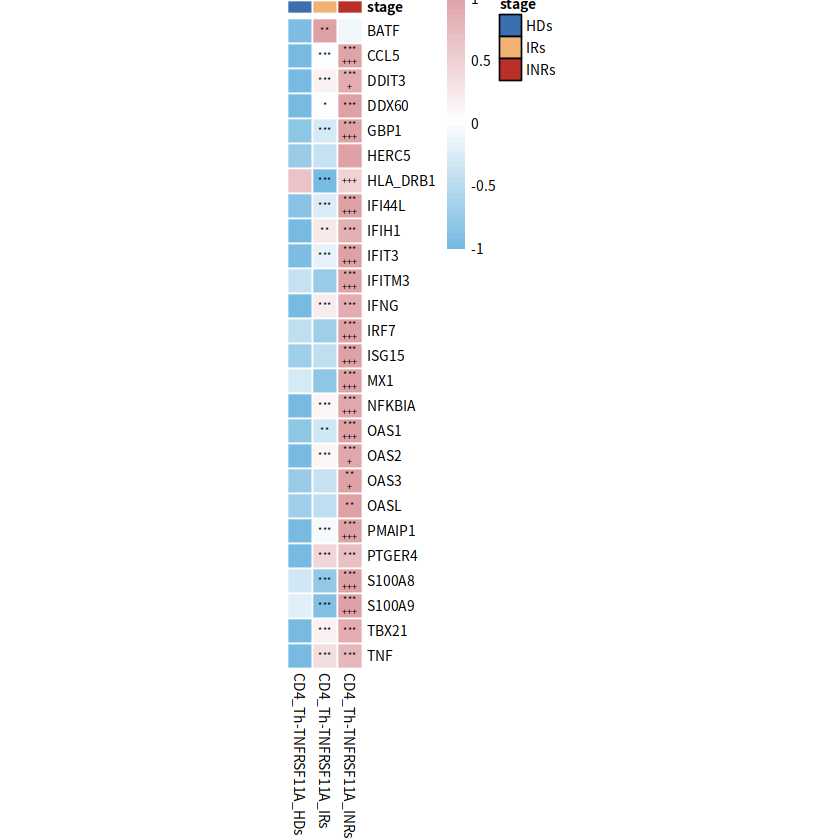

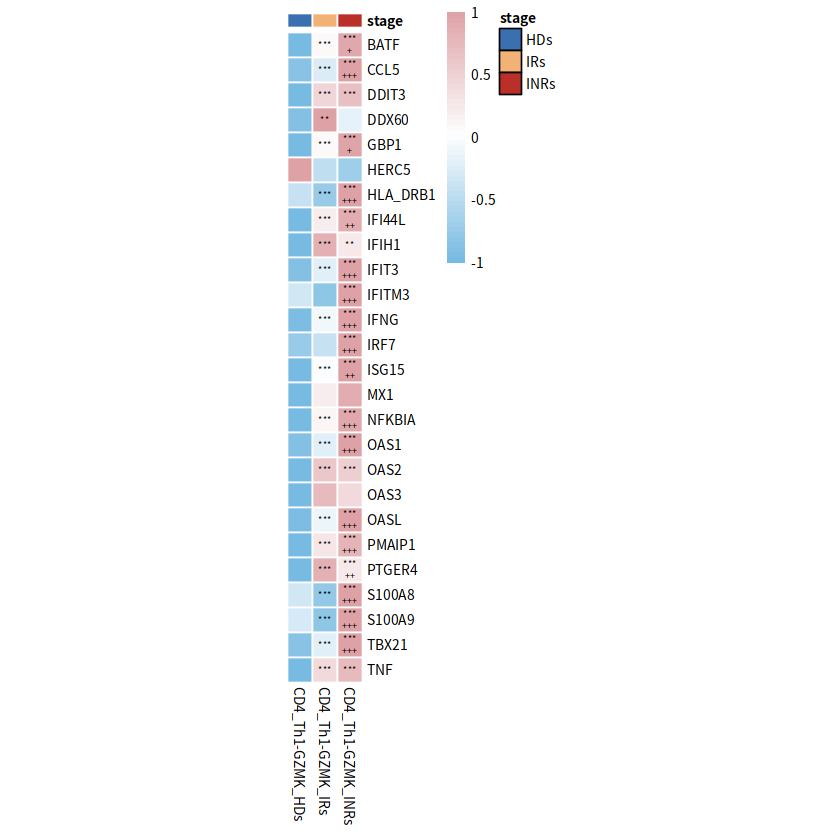

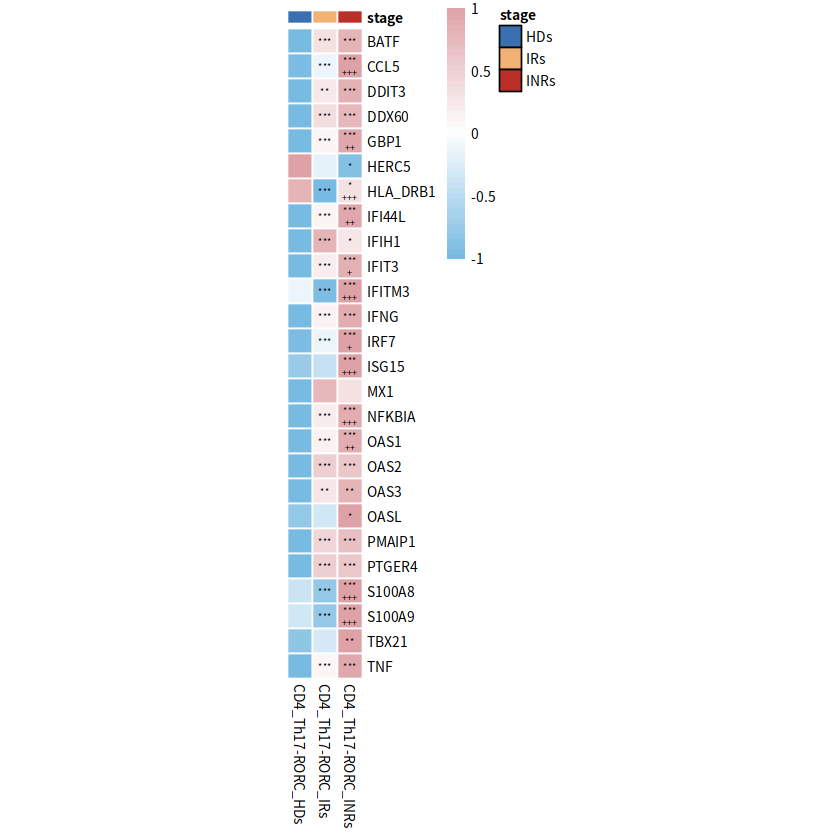

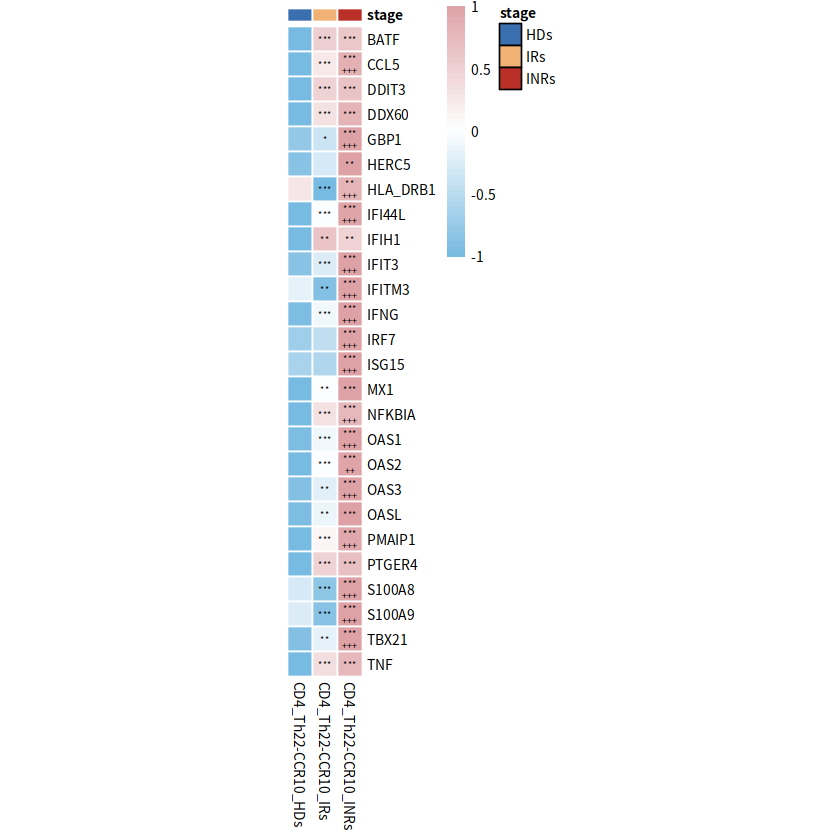

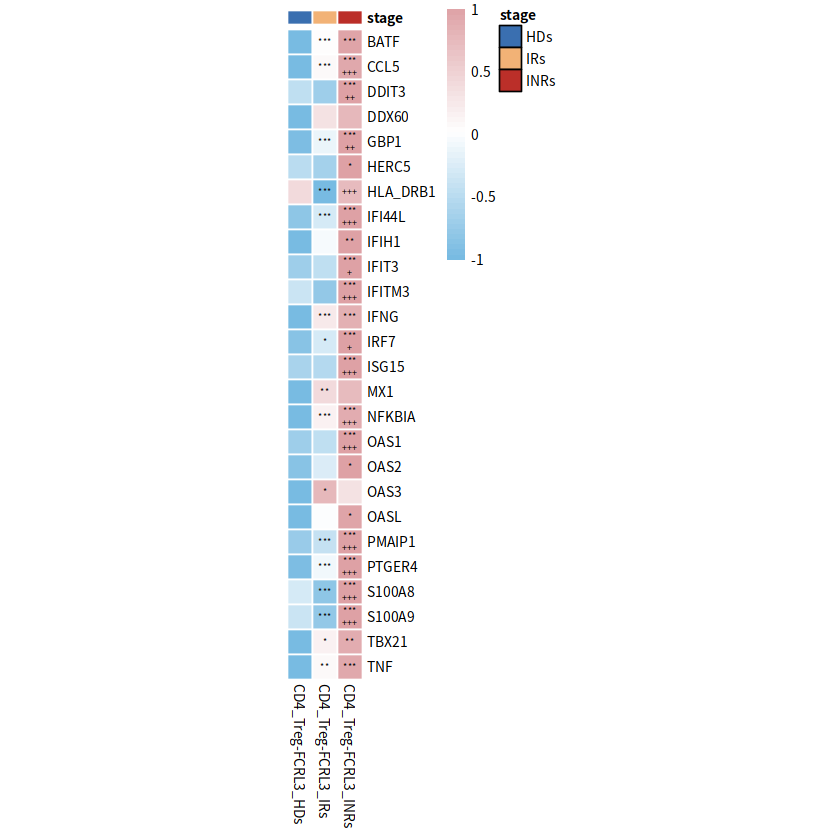

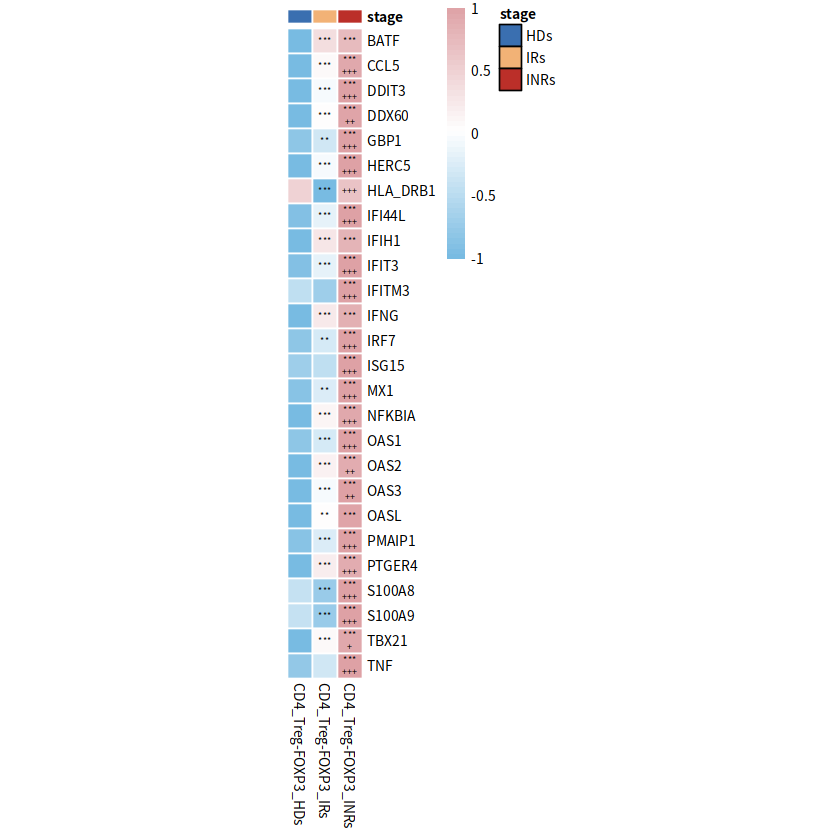

In [47]:
##作图
for (i in 1:(length(colnames(sort_data))/3)){
  a=3*i-2
  b=3*i
  sort_data_sub <- sort_data[,c(a:b)]
  df_sub <- df[,c(a:b)]
  annotation_col = data.frame(
    stage = rep(c("HDs","IRs","INRs"),1),
    row.names = colnames(sort_data_sub))
  ann_colors <- list(stage = c(HDs='#3A6FB0',IRs='#F2B276',INRs='#BB2F29'))
  p <- pheatmap(sort_data_sub,
                 fontsize=8,
                 cluster_cols = F,
                 cluster_rows = F,
                 breaks=seq(-1,1,length.out = 50),
                 display_numbers = df_sub,
                 number_color = "black",
                 fontsize_number = 5,
                #color = colorRampPalette(c("navy", "white", "firebrick3"))(50),
                 color = colorRampPalette(c("#78BBE2","white","#DEA1A5"))(50),
                 fontsize_col = 8,
                 fontsize_row = 8,
                 show_colnames = T,
                 cellwidth = 15, 
                 cellheight = 15,
                 #main = "NK Pathway Score\n* = significant compared to HDs\n+ = significant compared to IRs",
                 annotation_legend	= T,
                 scale="row",
                 annotation_col = annotation_col,
                 annotation_colors = ann_colors,
                 border=T,
                 border_color="white")
  p <- as.ggplot(p)
  name <- colnames(sort_data_sub)[1]
  ggsave(paste0("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/GeneScore/figure/CD4/",name,".pdf"),p,width=8,height=8)
}

### 基因热图

In [244]:
#data1 <- as.data.frame(read.csv("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/GeneScore/数据导出/Inflammatory_Response/CD4.csv",check.names = F,header = T))
#data2 <- as.data.frame(read.csv("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/GeneScore/数据导出/Inflammatory_Response/CD8.csv",check.names = F,header = T))
#data3 <- as.data.frame(read.csv("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/GeneScore/数据导出/Inflammatory_Response/NK.csv",check.names = F,header = T))
#data4 <- as.data.frame(read.csv("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/GeneScore/数据导出/Inflammatory_Response/Myeloid.csv",check.names = F,header = T))
#data5 <- as.data.frame(read.csv("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/GeneScore/数据导出/Inflammatory_Response/B.csv",check.names = F,header = T))

In [80]:
#data <- rbind(data1,data2,data3,data4,data5)
data <- as.data.frame(read.csv("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/GeneScore/数据导出/0904/ALL.csv",check.names = F,header = T))

In [81]:
data$stage <- factor(data$stage,levels = c("HDs",'IRs',"INRs"))
data <- data %>% select(-c("PF4"))
data <- subset(data, celltype_L3 %in% c('Naive_B-TCL1A','Naive_B-IL6','Naive_B-IFIT3','Transitional_B-NEIL1','Aptypical_Memory_B-ITGAX','Unswitched_Memory_B-CD1C','Unswitched_Memory_B-IFIT3','Unswitched_Memory_B-JAM3','Switched_Memory_B-CD27','Switched_Memory_B-CD86','Switched_Memory_B-IGHE','Plasma_B-IGHA1','Plasma_B-IGHG1',
                                        'Plasmablast-MKI67'))
data$celltype_L3 <- factor(data$celltype_L3,levels = c('Naive_B-TCL1A','Naive_B-IL6','Naive_B-IFIT3','Transitional_B-NEIL1','Aptypical_Memory_B-ITGAX','Unswitched_Memory_B-CD1C','Unswitched_Memory_B-IFIT3','Unswitched_Memory_B-JAM3','Switched_Memory_B-CD27','Switched_Memory_B-CD86','Switched_Memory_B-IGHE','Plasma_B-IGHA1','Plasma_B-IGHG1',
                                                       'Plasmablast-MKI67'))

In [82]:
colnames(data) <- gsub("-", "_", colnames(data))
data

,cellbarcode,AIF1,ARL4A,ATF3,BCL2A1,BTG2,CCL3,CCL4,CD14,CD69,⋯,SOCS3,TAGAP,TREM1,TYMP,TYROBP,VCAN,ZFP36,sample,celltype_L3,stage
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>
1,HD-H134-1-CELL16_N1,-0.4583403,-0.3306623,-0.1478554,-0.3030403,-0.5627567,-0.2377296,-0.5533876,-0.2214606,-0.7825321,⋯,-0.2901705,2.3942082,-0.1397765,-0.4659801,-0.6926186,-0.3355238,-0.7166799,HD-H134,Switched_Memory_B-CD27,HDs
2,HD-H134-1-CELL46_N1,-0.4583403,-0.3306623,-0.1478554,-0.3030403,-0.5627567,-0.2377296,-0.5533876,-0.2214606,-0.7825321,⋯,-0.2901705,-0.5457523,-0.1397765,-0.4659801,-0.6926186,-0.3355238,-0.7166799,HD-H134,Switched_Memory_B-CD27,HDs
3,HD-H134-1-CELL69_N1,-0.4583403,-0.3306623,-0.1478554,-0.3030403,2.1129253,-0.2377296,-0.5533876,-0.2214606,-0.7825321,⋯,-0.2901705,-0.5457523,-0.1397765,-0.4659801,-0.6926186,-0.3355238,-0.7166799,HD-H134,Switched_Memory_B-CD27,HDs
4,HD-H134-1-CELL79_N1,-0.4583403,-0.3306623,-0.1478554,-0.3030403,-0.5627567,-0.2377296,-0.5533876,-0.2214606,1.6582850,⋯,-0.2901705,-0.5457523,-0.1397765,-0.4659801,-0.6926186,-0.3355238,2.0585887,HD-H134,Unswitched_Memory_B-CD1C,HDs
5,HD-H134-1-CELL129_N2,-0.4583403,-0.3306623,-0.1478554,-0.3030403,-0.5627567,-0.2377296,-0.5533876,-0.2214606,1.4564918,⋯,-0.2901705,-0.5457523,-0.1397765,-0.4659801,0.2725902,1.0066599,-0.7166799,HD-H134,Switched_Memory_B-CD86,HDs
6,HD-H134-1-CELL134_N1,-0.4583403,-0.3306623,-0.1478554,-0.3030403,-0.5627567,-0.2377296,-0.5533876,-0.2214606,1.4866291,⋯,-0.2901705,-0.5457523,-0.1397765,1.6286116,-0.6926186,-0.3355238,-0.7166799,HD-H134,Naive_B-TCL1A,HDs
7,HD-H134-1-CELL141_N1,-0.4583403,-0.3306623,-0.1478554,-0.3030403,-0.5627567,-0.2377296,-0.5533876,-0.2214606,-0.7825321,⋯,-0.2901705,-0.5457523,-0.1397765,-0.4659801,-0.6926186,-0.3355238,0.9953383,HD-H134,Switched_Memory_B-CD27,HDs
8,HD-H134-1-CELL144_N1,-0.4583403,-0.3306623,-0.1478554,-0.3030403,-0.5627567,-0.2377296,-0.5533876,-0.2214606,-0.7825321,⋯,-0.2901705,-0.5457523,-0.1397765,-0.4659801,-0.6926186,-0.3355238,-0.7166799,HD-H134,Switched_Memory_B-CD27,HDs
9,HD-H134-1-CELL162_N1,-0.4583403,4.3169913,-0.1478554,-0.3030403,-0.5627567,-0.2377296,-0.5533876,-0.2214606,-0.7825321,⋯,-0.2901705,1.8954607,-0.1397765,-0.4659801,1.0132110,-0.3355238,1.2755139,HD-H134,Switched_Memory_B-CD27,HDs


In [83]:
##data
data_sub <- data[,c(-1,-66)]
grouped_data <- data_sub %>%
  group_by(stage, celltype_L3) %>%
  summarize(across(everything(), mean))
sort_data <- as.data.frame(grouped_data[order(grouped_data$stage,grouped_data$celltype_L3),])
rownames(sort_data) <- paste0(sort_data$celltype_L3,"_",sort_data$stage)
sort_data <- t(as.matrix(sort_data[,c(-1,-2)]))

`summarise()` has grouped output by 'stage'. You can override using the
`.groups` argument.


In [84]:
sort_data

,Naive_B-TCL1A_HDs,Naive_B-IL6_HDs,Naive_B-IFIT3_HDs,Transitional_B-NEIL1_HDs,Aptypical_Memory_B-ITGAX_HDs,Unswitched_Memory_B-CD1C_HDs,Unswitched_Memory_B-IFIT3_HDs,Unswitched_Memory_B-JAM3_HDs,Switched_Memory_B-CD27_HDs,Switched_Memory_B-CD86_HDs,⋯,Aptypical_Memory_B-ITGAX_INRs,Unswitched_Memory_B-CD1C_INRs,Unswitched_Memory_B-IFIT3_INRs,Unswitched_Memory_B-JAM3_INRs,Switched_Memory_B-CD27_INRs,Switched_Memory_B-CD86_INRs,Switched_Memory_B-IGHE_INRs,Plasma_B-IGHA1_INRs,Plasma_B-IGHG1_INRs,Plasmablast-MKI67_INRs
AIF1,-0.36657929,-0.40617846,-0.352509853,-0.36567713,-0.341842601,-0.36226675,-0.346273668,-0.34526118,-0.36345337,-0.34872520,⋯,-0.28683476,-0.32506329,-0.30151204,-0.31629080,-0.33604816,-0.31373448,-0.29694425,-0.23195782,-0.32931131,-0.28012486
ARL4A,0.14926433,0.34868806,0.149720631,0.30806385,0.291975052,0.20060260,0.218877885,0.36965003,0.01347390,0.14674871,⋯,0.60972666,0.55079296,0.57050113,0.74957929,0.25158066,0.31900460,0.35663500,-0.14417628,-0.13539706,-0.07440317
ATF3,-0.13432224,-0.09525512,-0.124029750,-0.13268712,-0.087434976,-0.13013075,-0.118621565,-0.13019163,-0.13342938,-0.09877673,⋯,0.00187413,-0.06019989,-0.09445181,-0.06968561,-0.06051707,-0.02932419,-0.06347097,0.10863214,-0.05550421,0.08376378
BCL2A1,-0.06842240,0.57813170,-0.017156206,-0.12377485,0.515391139,0.24101423,0.323760252,0.37730828,0.20353583,0.60713636,⋯,0.79800295,0.43643044,0.40958590,0.56119931,0.33977498,0.70987846,0.72660449,-0.04363372,-0.04744318,-0.17230835
BTG2,0.11015266,0.52591405,0.116450760,0.26848044,0.371800091,0.27958495,0.251912176,0.57395721,0.01415946,0.12144634,⋯,0.43689922,0.41096557,0.37786371,0.59930288,0.05892588,0.33332116,0.27654251,-0.12552299,0.06911515,-0.26021454
CCL3,-0.21031166,-0.16326358,-0.219484147,-0.20664039,-0.221635807,-0.21815630,-0.212263761,-0.21727616,-0.21996600,-0.21409351,⋯,-0.16598250,-0.17409994,-0.19399030,-0.16857051,-0.15859208,-0.15945907,-0.19538411,-0.06913472,-0.12059893,-0.14708325
CCL4,-0.47730787,-0.42169000,-0.462911546,-0.43283320,-0.485960480,-0.49313265,-0.501843284,-0.47261434,-0.49553891,-0.47437894,⋯,-0.37493685,-0.40950260,-0.40906620,-0.37696948,-0.41044231,-0.39887066,-0.39250755,-0.36536470,-0.34018827,-0.30752357
CD14,-0.18593602,-0.21302418,-0.182998798,-0.18606491,-0.177774944,-0.18050424,-0.191014408,-0.18730927,-0.18209263,-0.18058856,⋯,-0.15778653,-0.16327833,-0.16359048,-0.16716707,-0.16467129,-0.15833280,-0.16595374,-0.10801041,-0.10781229,-0.19205393
CD69,0.10935412,1.20950081,0.110548280,0.25188185,-0.351699607,-0.05579464,-0.175025960,0.17575303,-0.38251436,-0.34515738,⋯,-0.02873251,0.46033211,0.32277817,0.66914991,0.01303574,0.18514821,0.07981188,-0.50563977,-0.53586508,-0.60668647
CD83,1.08900012,3.54431586,0.958895638,1.03464891,0.721994977,1.02122323,0.661930516,1.39615646,0.36988771,0.25269909,⋯,0.70306794,0.83312019,0.45925722,1.08017408,0.27277862,0.33479089,0.61879976,-0.16964373,-0.20398560,-0.21152174


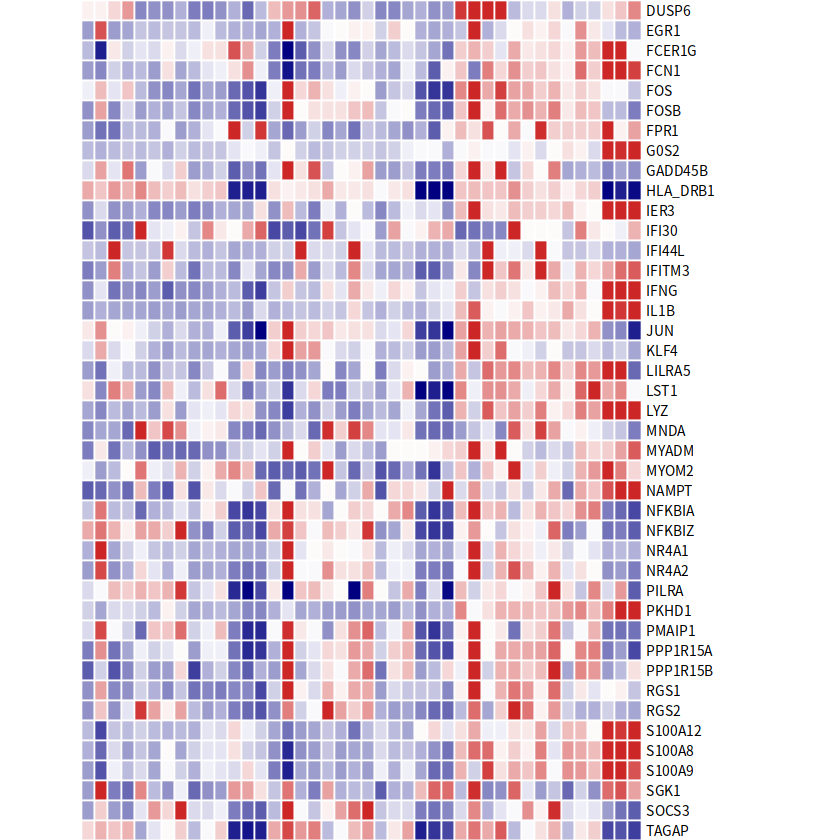

In [85]:
p <- pheatmap(sort_data,
                 fontsize=8,
                 cluster_cols = F,
                 cluster_rows = F,
                 breaks=seq(-2,2,length.out = 50),
                 fontsize_number = 5,
                 color = colorRampPalette(c("navy", "white", "firebrick3"))(50),
                 #color = colorRampPalette(c("#78BBE2","white","#DEA1A5"))(50),
                 fontsize_col = 8,
                 fontsize_row = 8,
                 show_colnames = T,
                 cellwidth = 8, 
                 cellheight = 12,
                 annotation_legend	= T,
                 scale="row",
                 border=T,
                 border_color="white")
p <- as.ggplot(p)
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/GeneScore/数据导出/0904/ALL_B.pdf",p,width=25,height=15)

### 共有差异基因

#### IRs vs HDs

In [42]:
# 设置包含文件夹路径的向量
folders <- c("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/Subcelltype/B/DEG/",
             "/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/Subcelltype/CD4/DEG/",
             "/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/Subcelltype/CD8/DEG/",
             "/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/Subcelltype/Myeloid/DEG/",
             "/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/Subcelltype/NK/DEG/")

# 初始化一个空列表来存储所有筛选后的数据框
filtered_data_list <- list()

# 遍历每个文件夹
for (folder in folders) {
  # 获取文件夹中的所有以IRs_vs_HDs结尾的CSV文件
  files <- list.files(path = folder, pattern = ".*IRs_vs_HDs\\.csv$", full.names = TRUE)
  
  # 读取并筛选数据，并以文件名前缀命名列表中的每个数据框
  temp_list <- lapply(files, function(file) {
    data <- read.csv(file)
    # 筛选 log2FC 绝对值大于 0.58 且 padj 小于 0.05 的行
    filtered_data <- subset(data, logfoldchanges > 0.58 & pvals_adj < 0.05)
    return(filtered_data)
  })
  
  # 提取文件名前缀
  file_prefixes <- sub("_IRs_vs_HDs\\.csv$", "", basename(files))
  names(temp_list) <- file_prefixes
  
  # 合并临时列表到主列表中
  filtered_data_list <- c(filtered_data_list, temp_list)
}

In [43]:
# 获取所有基因名的列表
all_genes <- unique(unlist(lapply(filtered_data_list, function(df) df$names)))
# 初始化基因在细胞类型中出现次数的向量
gene_counts <- setNames(rep(0, length(all_genes)), all_genes)
# 统计每个基因在不同细胞类型中的出现次数
for (df in filtered_data_list) {
  genes_in_df <- df$names
  gene_counts[genes_in_df] <- gene_counts[genes_in_df] + 1
}
# 统计基因在不同细胞类型中共有的数目
shared_gene_counts <- sapply(1:length(filtered_data_list), function(i) {
  sum(gene_counts == i)
})
shared_gene_counts_sub <- c(shared_gene_counts[1:9], sum(gene_counts >= 10))

In [44]:
labels <- c(paste0(1:9, " cell types"), ">=10 cell types")
values <- shared_gene_counts_sub
pie_data <- data.frame(labels, values)
pie_data

labels,values
<chr>,<int>
1 cell types,316
2 cell types,127
3 cell types,73
4 cell types,45
5 cell types,28
6 cell types,21
7 cell types,15
8 cell types,10
9 cell types,8


Saving 7 x 7 in image


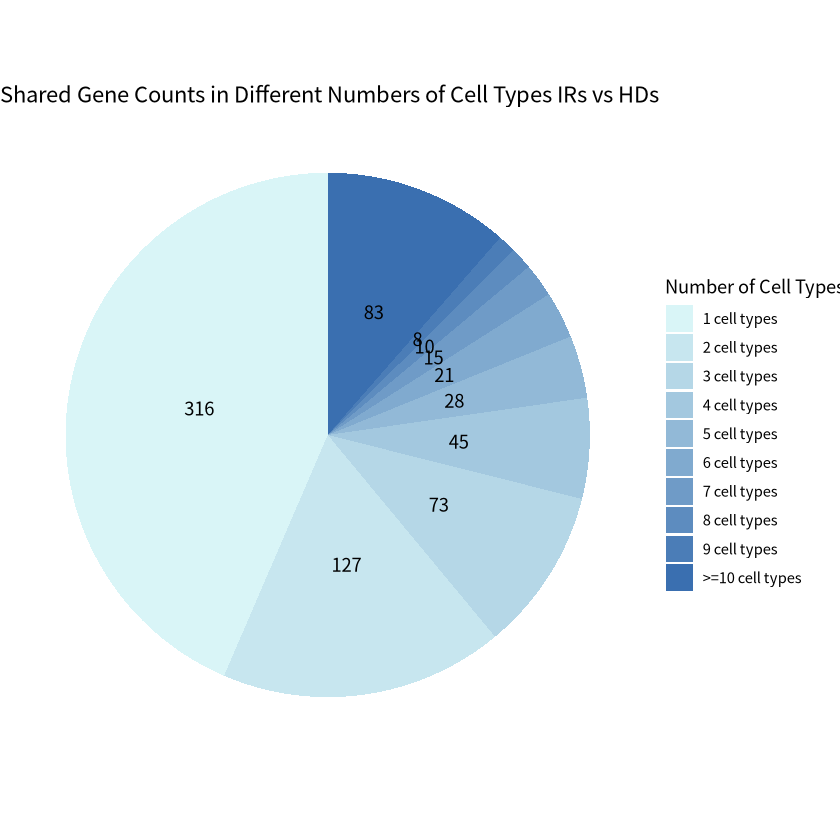

In [45]:
p <- ggplot(pie_data, aes(x = "", y = values, fill = factor(labels, levels = labels))) +
     geom_bar(width = 1, stat = "identity") +
     coord_polar("y", start = 0) +
     theme_void() +
     labs(fill = "Number of Cell Types", title = "Shared Gene Counts in Different Numbers of Cell Types IRs vs HDs") +
     geom_text(aes(label = values), position = position_stack(vjust = 0.5)) +
     scale_fill_manual(values = colorRampPalette(c("#D9F5F7", "#3A6FB0"))(length(labels)))
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/GeneScore/基因共享/pie_IRs_vs_HDs.pdf",p)

In [46]:
shared_genes_10_or_more <- as.data.frame(names(gene_counts[gene_counts >= 10]))
colnames(shared_genes_10_or_more) <- "IRs_vs_HDs"
shared_genes_10_or_more
write.csv(shared_genes_10_or_more,"/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/GeneScore/基因共享/IRs_vs_HDs.csv")

IRs_vs_HDs
<chr>
KLF6
FOSB
NBEAL1
FOS
DUSP1
NACA2
CD69
NHSL2
NFKBIA


#### INRs vs HDs

In [47]:
# 设置包含文件夹路径的向量
folders <- c("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/Subcelltype/B/DEG/",
             "/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/Subcelltype/CD4/DEG/",
             "/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/Subcelltype/CD8/DEG/",
             "/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/Subcelltype/Myeloid/DEG/",
             "/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/Subcelltype/NK/DEG/")

# 初始化一个空列表来存储所有筛选后的数据框
filtered_data_list <- list()

# 遍历每个文件夹
for (folder in folders) {
  # 获取文件夹中的所有以IRs_vs_HDs结尾的CSV文件
  files <- list.files(path = folder, pattern = ".*INRs_vs_HDs\\.csv$", full.names = TRUE)
  
  # 读取并筛选数据，并以文件名前缀命名列表中的每个数据框
  temp_list <- lapply(files, function(file) {
    data <- read.csv(file)
    # 筛选 log2FC 绝对值大于 0.58 且 padj 小于 0.05 的行
    filtered_data <- subset(data, logfoldchanges > 0.58 & pvals_adj < 0.05)
    return(filtered_data)
  })
  
  # 提取文件名前缀
  file_prefixes <- sub("_INRs_vs_HDs\\.csv$", "", basename(files))
  names(temp_list) <- file_prefixes
  
  # 合并临时列表到主列表中
  filtered_data_list <- c(filtered_data_list, temp_list)
}

In [48]:
# 获取所有基因名的列表
all_genes <- unique(unlist(lapply(filtered_data_list, function(df) df$names)))
# 初始化基因在细胞类型中出现次数的向量
gene_counts <- setNames(rep(0, length(all_genes)), all_genes)
# 统计每个基因在不同细胞类型中的出现次数
for (df in filtered_data_list) {
  genes_in_df <- df$names
  gene_counts[genes_in_df] <- gene_counts[genes_in_df] + 1
}
# 统计基因在不同细胞类型中共有的数目
shared_gene_counts <- sapply(1:length(filtered_data_list), function(i) {
  sum(gene_counts == i)
})
shared_gene_counts_sub <- c(shared_gene_counts[1:9], sum(gene_counts >= 10))

In [49]:
labels <- c(paste0(1:9, " cell types"), ">=10 cell types")
values <- shared_gene_counts_sub
pie_data <- data.frame(labels, values)
pie_data

labels,values
<chr>,<int>
1 cell types,488
2 cell types,145
3 cell types,91
4 cell types,59
5 cell types,42
6 cell types,30
7 cell types,27
8 cell types,19
9 cell types,16


Saving 7 x 7 in image


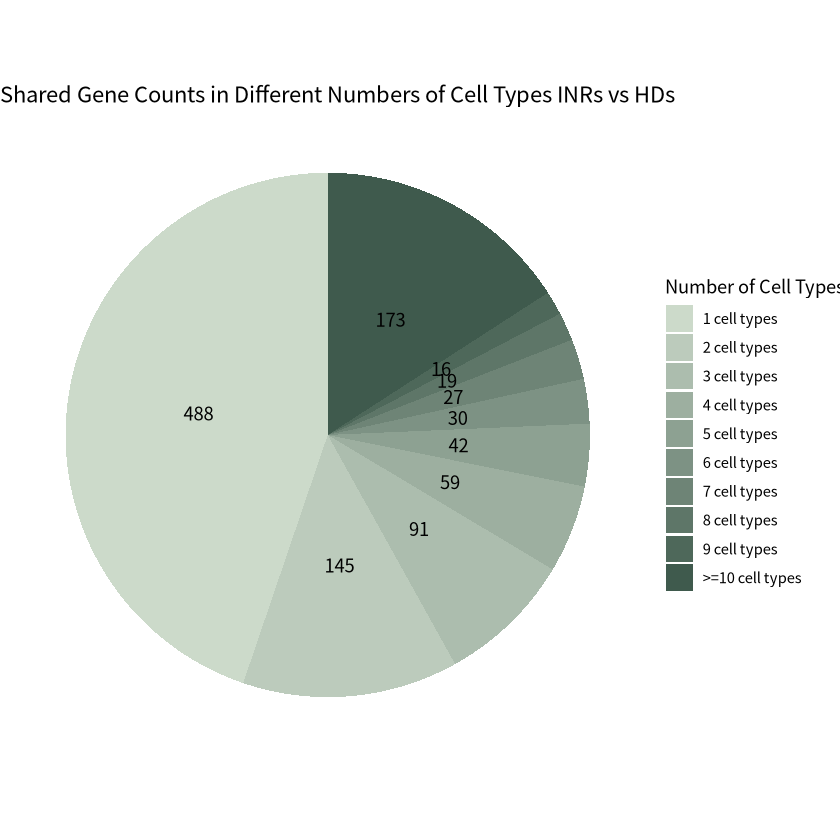

In [50]:
p <- ggplot(pie_data, aes(x = "", y = values, fill = factor(labels, levels = labels))) +
     geom_bar(width = 1, stat = "identity") +
     coord_polar("y", start = 0) +
     theme_void() +
     labs(fill = "Number of Cell Types", title = "Shared Gene Counts in Different Numbers of Cell Types INRs vs HDs") +
     geom_text(aes(label = values), position = position_stack(vjust = 0.5)) +
     scale_fill_manual(values = colorRampPalette(c("#CCDACA", "#3F5A4D"))(length(labels)))
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/GeneScore/基因共享/pie_INRs_vs_HDs_up.pdf",p)

In [22]:
shared_genes_10_or_more <- as.data.frame(names(gene_counts[gene_counts >= 10]))
colnames(shared_genes_10_or_more) <- "INRs_vs_HDs"
shared_genes_10_or_more
write.csv(shared_genes_10_or_more,"/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/GeneScore/基因共享/INRs_vs_HDs_up.csv")

INRs_vs_HDs
<chr>
FOS
FOSB
KLF6
DUSP1
JUN
NBEAL1
NR4A2
IER2
GNLY


#### INRs vs IRs

In [37]:
# 设置包含文件夹路径的向量
folders <- c("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/Subcelltype/B/DEG/",
             "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/Subcelltype/CD4/DEG/",
             "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/Subcelltype/CD8/DEG/",
             "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/Subcelltype/Myeloid/DEG/",
             "/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/Subcelltype/NK/DEG/")

# 初始化一个空列表来存储所有筛选后的数据框
filtered_data_list <- list()

# 遍历每个文件夹
for (folder in folders) {
  # 获取文件夹中的所有以IRs_vs_HDs结尾的CSV文件
  files <- list.files(path = folder, pattern = ".*INRs_vs_IRs\\.csv$", full.names = TRUE)
  
  # 读取并筛选数据，并以文件名前缀命名列表中的每个数据框
  temp_list <- lapply(files, function(file) {
    data <- read.csv(file)
    # 筛选 log2FC 绝对值大于 0.58 且 padj 小于 0.05 的行
    filtered_data <- subset(data, logfoldchanges > 0.58 & pvals_adj < 0.05)
    return(filtered_data)
  })
  
  # 提取文件名前缀
  file_prefixes <- sub("_INRs_vs_IRs\\.csv$", "", basename(files))
  names(temp_list) <- file_prefixes
  
  # 合并临时列表到主列表中
  filtered_data_list <- c(filtered_data_list, temp_list)
}

In [38]:
# 获取所有基因名的列表
all_genes <- unique(unlist(lapply(filtered_data_list, function(df) df$names)))
# 初始化基因在细胞类型中出现次数的向量
gene_counts <- setNames(rep(0, length(all_genes)), all_genes)
# 统计每个基因在不同细胞类型中的出现次数
for (df in filtered_data_list) {
  genes_in_df <- df$names
  gene_counts[genes_in_df] <- gene_counts[genes_in_df] + 1
}
# 统计基因在不同细胞类型中共有的数目
shared_gene_counts <- sapply(1:length(filtered_data_list), function(i) {
  sum(gene_counts == i)
})
shared_gene_counts_sub <- c(shared_gene_counts[1:9], sum(gene_counts >= 10))

In [39]:
labels <- c(paste0(1:9, " cell types"), ">=10 cell types")
values <- shared_gene_counts_sub
pie_data <- data.frame(labels, values)
pie_data

labels,values
<chr>,<int>
1 cell types,333
2 cell types,73
3 cell types,42
4 cell types,20
5 cell types,20
6 cell types,16
7 cell types,11
8 cell types,4
9 cell types,8


Saving 7 x 7 in image


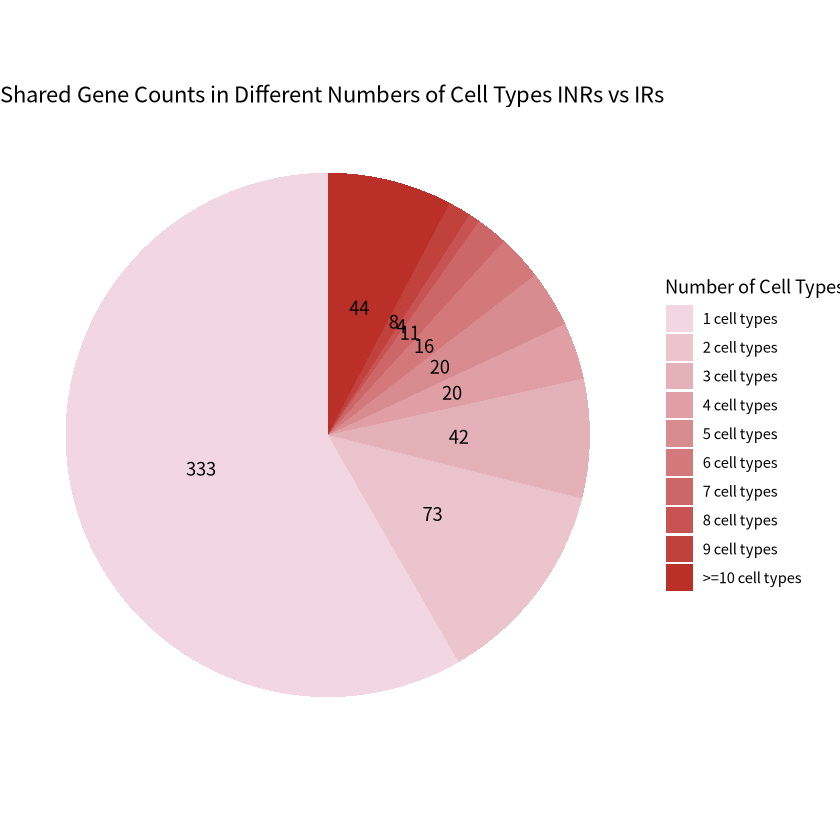

In [40]:
p <- ggplot(pie_data, aes(x = "", y = values, fill = factor(labels, levels = labels))) +
     geom_bar(width = 1, stat = "identity") +
     coord_polar("y", start = 0) +
     theme_void() +
     labs(fill = "Number of Cell Types", title = "Shared Gene Counts in Different Numbers of Cell Types INRs vs IRs") +
     geom_text(aes(label = values), position = position_stack(vjust = 0.5)) +
     scale_fill_manual(values = colorRampPalette(c("#F2D7E3", "#BB2F29"))(length(labels)))
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/GeneScore/基因共享/pie_INRs_vs_IRs_up.pdf",p)

In [41]:
shared_genes_10_or_more <- as.data.frame(names(gene_counts[gene_counts >= 10]))
colnames(shared_genes_10_or_more) <- "INRs_vs_IRs"
shared_genes_10_or_more
write.csv(shared_genes_10_or_more,"/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/GeneScore/基因共享/INRs_vs_IRs_up.csv")

INRs_vs_IRs
<chr>
IFI30
S100A9
LST1
IFI44L
FOS
FOSB
CD69
MYADM
LYZ


### >=10 celltypes Upset图

In [161]:
folder_path <- '/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/GeneScore/基因共享/'
deg_files <- list.files(path = folder_path, pattern = ".csv$", full.names = TRUE)

deg_list <- list()
for (file_name in deg_files) {
  data <- read.csv(file_name)
  filename <- basename(file_name)
  parts <- gsub("\\.csv$", "", filename)
  data <- data[,-c(1)]
  deg_list[[parts]] <- data
}

In [165]:
dev.off()
dev.new()

png 
  3

In [174]:
library(UpSetR)
pdf('/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/GeneScore/基因共享/UpSet.pdf',width = 4,height = 3)
upset(fromList(deg_list),nsets=length(deg_list), order.by = "freq",
      sets.x.label = "Gene Size",mainbar.y.label = "Intersection Size",
      sets.bar.color=c('#2A6350','#3A6FB0','#BB2F29'),
      main.bar.color=c('#402850'))
dev.off()

png 
  2

In [182]:
deg_list

$INRs_vs_HDs
  [1] "FOS"        "FOSB"       "KLF6"       "DUSP1"      "JUN"       
  [6] "NBEAL1"     "NR4A2"      "IER2"       "GNLY"       "JUNB"      
 [11] "RGS1"       "NFKBIA"     "CD69"       "CCL5"       "NACA2"     
 [16] "RHOB"       "PPP1R15A"   "RGS2"       "MYADM"      "IGHG3"     
 [21] "XAF1"       "ATP5MGL"    "CSRNP1"     "FCGR3A"     "CDKN2B-AS1"
 [26] "GZMH"       "NR4A1"      "ARL4A"      "FGFBP2"     "ARRDC3"    
 [31] "IFI44L"     "PPP1R15B"   "CCL4"       "GZMA"       "LYZ"       
 [36] "Z82206.1"   "TRIM25"     "DUSP2"      "TYROBP"     "SPON2"     
 [41] "EGR1"       "CD8A"       "GZMB"       "KLRK1"      "DDIT4"     
 [46] "CST7"       "EPSTI1"     "KLRD1"      "KLF10"      "UQCRHL"    
 [51] "ID2"        "S100A8"     "ADGRG1"     "EGR2"       "RGCC"      
 [56] "TOB1"       "DCTN6"      "GTF2B"      "SC5D"       "BCL3"      
 [61] "RIPOR1"     "CREM"       "MHENCR"     "CRIP2"      "S1PR1"     
 [66] "PER1"       "IFNGR1"     "CCR7"       "PIP4P1"     "CXCR5"     
 [71] "RNF126"     "P2RY10"     "EIF1B"      "SNN"        "HERPUD1"   
 [76] "RBM38"      "PDE4B"      "GPR183"     "NHSL2"      "S100A9"    
 [81] "HNRNPA1P48" "IER5"       "DUSP6"      "ARRDC2"     "KLF2"      
 [86] "YPEL5"      "ZFP36"      "TUBA1A"     "KLF4"       "BTG2"      
 [91] "DNAJA1"     "YBX3"       "CD83"       "HLA-DQB1"   "AREG"      
 [96] "CDKN1A"     "PTGER4"     "CCR6"       "HEXIM1"     "TYMP"      
[101] "EIF4A3"     "MIDN"       "EIF5AL1"    "FAM53C"     "VCAN"      
[106] "PABPC3"     "CITED2"     "UBE2S"      "FCN1"       "IGHG4"     
[111] "SERTAD1"    "IER3"       "C12orf54"   "DNAAF2"     "UBE2L5"    
[116] "SOCS1"      "SULT1A3"    "SOCS3"      "IL1B"       "SH2D2A"    
[121] "CCL3"       "SAMD3"      "PKHD1"      "H2AFX"      "BHLHE40"   
[126] "NEU1"       "IFIT3"      "CXCL8"      "CES1"       "ATF3"      
[131] "FKBP1C"     "LMNA"       "LEF1"       "MAFK"       "MAL"       
[136] "GIMAP5"     "THEMIS2"    "TCF7"       "SESN3"      "ARID5A"    
[141] "TSC22D3"    "JCHAIN"     "KCNK6"      "ZNF90"      "TRMT5"     
[146] "SAMSN1"     "ZNF101"     "CDKN1B"     "RSRP1"      "TNFSF10"   
[151] "FAM71D"     "TRIM52-AS1" "LEPROTL1"   "IL7R"       "ODC1"      
[156] "TNFAIP3"    "HSPH1"      "IFRD1"      "HNRNPA1L2"  "DDX28"     
[161] "MTFP1"      "RNF103"     "FKBP8"      "OSER1"      "RSAD2"     
[166] "OAS1"       "TAGAP"      "IGLC1"      "CD8B"       "PTGER2"    
[171] "SGK1"       "HIPK1-AS1"  "SLC25A20"   "PMAIP1"     "TIGIT"     
[176] "CSTF1"      "PLCL1"      "CDR2"       "FHIT"       "CD28"      
[181] "CD4"        "GIMAP7"     "CISH"       "ADPRM"      "NPDC1"     
[186] "NELL2"      "IRS2"       "DYNLT1"     "PIK3R1"     "TOB2"      
[191] "PIK3IP1"    "RAB29"      "TSC22D4"    "NAMPT"      "RASGEF1B"  
[196] "RCAN3"      "MIR22HG"    "PHLDA1"     "IGKC"       "PRR5L"     
[201] "IFNG"       "TNF"        "ID1"        "METRNL"     "HIST1H2BG" 

$INRs_vs_IRs
 [1] "IFI30"    "S100A9"   "LST1"     "IFI44L"   "TCF7"     "HLA-DQA2"
 [7] "S100A8"   "LYZ"      "CD83"     "FOS"      "FOSB"     "DUSP1"   
[13] "CD69"     "PPP1R15A" "MYADM"    "NR4A2"    "RGS1"     "TYROBP"  
[19] "DUSP6"    "KLF4"     "CCL4"     "NR4A1"    "FCN1"     "CST3"    
[25] "IFITM3"   "MYOM2"    "IER3"     "FCER1G"   "EGR1"     "IL1B"    
[31] "CCL3"     "RGS2"     "TYMP"     "DUSP2"    "CSRNP1"   "JUN"     
[37] "PMAIP1"   "ZFP36"    "ATF3"    

$IRs_vs_HDs
  [1] "KLF6"       "FOSB"       "NBEAL1"     "FOS"        "DUSP1"     
  [6] "NACA2"      "CD69"       "NHSL2"      "NFKBIA"     "NR4A2"     
 [11] "ATP5MGL"    "HLA-DQA2"   "RGS1"       "ARRDC3"     "CDKN2B-AS1"
 [16] "MYADM"      "GZMH"       "Z82206.1"   "CSRNP1"     "ARL4A"     
 [21] "KLF10"      "CPT1A"      "CFAP44"     "EGR1"       "NR4A1"     
 [26] "EIF5AL1"    "ADGRG1"     "PTGER4"     "KLRD1"      "TRMT5"     
 [31] "CCL4"       "TOB1"       "IFI44L"     "UQCRHL"     "GNG11"     
 [36] "PPBP"       "DCTN6"      "PF4"        "BCL3"       "SC5D"      
 [41] "ARID5A"   

In [184]:
deg_list_sub <- deg_list[1:2]
deg_list_sub

$INRs_vs_HDs
  [1] "FOS"        "FOSB"       "KLF6"       "DUSP1"      "JUN"       
  [6] "NBEAL1"     "NR4A2"      "IER2"       "GNLY"       "JUNB"      
 [11] "RGS1"       "NFKBIA"     "CD69"       "CCL5"       "NACA2"     
 [16] "RHOB"       "PPP1R15A"   "RGS2"       "MYADM"      "IGHG3"     
 [21] "XAF1"       "ATP5MGL"    "CSRNP1"     "FCGR3A"     "CDKN2B-AS1"
 [26] "GZMH"       "NR4A1"      "ARL4A"      "FGFBP2"     "ARRDC3"    
 [31] "IFI44L"     "PPP1R15B"   "CCL4"       "GZMA"       "LYZ"       
 [36] "Z82206.1"   "TRIM25"     "DUSP2"      "TYROBP"     "SPON2"     
 [41] "EGR1"       "CD8A"       "GZMB"       "KLRK1"      "DDIT4"     
 [46] "CST7"       "EPSTI1"     "KLRD1"      "KLF10"      "UQCRHL"    
 [51] "ID2"        "S100A8"     "ADGRG1"     "EGR2"       "RGCC"      
 [56] "TOB1"       "DCTN6"      "GTF2B"      "SC5D"       "BCL3"      
 [61] "RIPOR1"     "CREM"       "MHENCR"     "CRIP2"      "S1PR1"     
 [66] "PER1"       "IFNGR1"     "CCR7"       "PIP4P1"     "CXCR5"     
 [71] "RNF126"     "P2RY10"     "EIF1B"      "SNN"        "HERPUD1"   
 [76] "RBM38"      "PDE4B"      "GPR183"     "NHSL2"      "S100A9"    
 [81] "HNRNPA1P48" "IER5"       "DUSP6"      "ARRDC2"     "KLF2"      
 [86] "YPEL5"      "ZFP36"      "TUBA1A"     "KLF4"       "BTG2"      
 [91] "DNAJA1"     "YBX3"       "CD83"       "HLA-DQB1"   "AREG"      
 [96] "CDKN1A"     "PTGER4"     "CCR6"       "HEXIM1"     "TYMP"      
[101] "EIF4A3"     "MIDN"       "EIF5AL1"    "FAM53C"     "VCAN"      
[106] "PABPC3"     "CITED2"     "UBE2S"      "FCN1"       "IGHG4"     
[111] "SERTAD1"    "IER3"       "C12orf54"   "DNAAF2"     "UBE2L5"    
[116] "SOCS1"      "SULT1A3"    "SOCS3"      "IL1B"       "SH2D2A"    
[121] "CCL3"       "SAMD3"      "PKHD1"      "H2AFX"      "BHLHE40"   
[126] "NEU1"       "IFIT3"      "CXCL8"      "CES1"       "ATF3"      
[131] "FKBP1C"     "LMNA"       "LEF1"       "MAFK"       "MAL"       
[136] "GIMAP5"     "THEMIS2"    "TCF7"       "SESN3"      "ARID5A"    
[141] "TSC22D3"    "JCHAIN"     "KCNK6"      "ZNF90"      "TRMT5"     
[146] "SAMSN1"     "ZNF101"     "CDKN1B"     "RSRP1"      "TNFSF10"   
[151] "FAM71D"     "TRIM52-AS1" "LEPROTL1"   "IL7R"       "ODC1"      
[156] "TNFAIP3"    "HSPH1"      "IFRD1"      "HNRNPA1L2"  "DDX28"     
[161] "MTFP1"      "RNF103"     "FKBP8"      "OSER1"      "RSAD2"     
[166] "OAS1"       "TAGAP"      "IGLC1"      "CD8B"       "PTGER2"    
[171] "SGK1"       "HIPK1-AS1"  "SLC25A20"   "PMAIP1"     "TIGIT"     
[176] "CSTF1"      "PLCL1"      "CDR2"       "FHIT"       "CD28"      
[181] "CD4"        "GIMAP7"     "CISH"       "ADPRM"      "NPDC1"     
[186] "NELL2"      "IRS2"       "DYNLT1"     "PIK3R1"     "TOB2"      
[191] "PIK3IP1"    "RAB29"      "TSC22D4"    "NAMPT"      "RASGEF1B"  
[196] "RCAN3"      "MIR22HG"    "PHLDA1"     "IGKC"       "PRR5L"     
[201] "IFNG"       "TNF"        "ID1"        "METRNL"     "HIST1H2BG" 

$INRs_vs_IRs
 [1] "IFI30"    "S100A9"   "LST1"     "IFI44L"   "TCF7"     "HLA-DQA2"
 [7] "S100A8"   "LYZ"      "CD83"     "FOS"      "FOSB"     "DUSP1"   
[13] "CD69"     "PPP1R15A" "MYADM"    "NR4A2"    "RGS1"     "TYROBP"  
[19] "DUSP6"    "KLF4"     "CCL4"     "NR4A1"    "FCN1"     "CST3"    
[25] "IFITM3"   "MYOM2"    "IER3"     "FCER1G"   "EGR1"     "IL1B"    
[31] "CCL3"     "RGS2"     "TYMP"     "DUSP2"    "CSRNP1"   "JUN"     
[37] "PMAIP1"   "ZFP36"    "ATF3"

In [185]:
upset_data <- fromList(deg_list_sub)
shared_genes <- Reduce(intersect, deg_list_sub)
shared_genes

[1] "FOS"      "FOSB"     "DUSP1"    "JUN"      "NR4A2"    "RGS1"    
 [7] "CD69"     "PPP1R15A" "RGS2"     "MYADM"    "CSRNP1"   "NR4A1"   
[13] "IFI44L"   "CCL4"     "LYZ"      "DUSP2"    "TYROBP"   "EGR1"    
[19] "S100A8"   "S100A9"   "DUSP6"    "ZFP36"    "KLF4"     "CD83"    
[25] "TYMP"     "FCN1"     "IER3"     "IL1B"     "CCL3"     "ATF3"    
[31] "TCF7"     "PMAIP1"

In [192]:
folder_path <- "/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/PathwayScore/Geneset/Inflammatory_response/"

# 获取文件夹中的所有txt文件
txt_files <- list.files(path = folder_path, pattern = "\\.txt$", full.names = TRUE)

# 初始化一个空列表来存储所有文件的基因数据
gene_list <- list()

# 遍历每个文件并读取基因数据
for (file in txt_files) {
  # 读取文件
  data <- read.table(file, header = TRUE, sep = "\t")
  
  # 提取基因列（假设基因列名为"gene"）
  genes <- data[,1]
  
  # 将基因添加到列表中
  gene_list[[file]] <- genes
}

# 合并所有文件中的基因
all_genes <- unique(unlist(gene_list))

In [193]:
all_genes

[1] "CXCL13"    "SCN11A"    "ADORA2B"   "CYP19A1"   "UNC13D"    "IL4"      
   [7] "IL10"      "IDO1"      "LTA"       "FOXP3"     "S100A8"    "S100A9"   
  [13] "CCL5"      "NFKBIZ"    "THBS1"     "TNF"       "TNFAIP3"   "VCAM1"    
  [19] "VNN1"      "A2M"       "ACVR1B"    "ACVRL1"    "BAK1"      "CBL"      
  [25] "CCL7"      "CCR1"      "CD14"      "CD36"      "CD38"      "CD44"     
  [31] "CD9"       "CNTFR"     "CRLF2"     "CSF1"      "CSF2"      "CSF2RA"   
  [37] "CSF2RB"    "CSF3R"     "CXCL1"     "CXCL10"    "CXCL11"    "CXCL3"    
  [43] "CXCL9"     "DNTT"      "EBI3"      "FAS"       "GRB2"      "HAX1"     
  [49] "HMOX1"     "IFNAR1"    "IFNGR1"    "IFNGR2"    "IL10RB"    "IL12RB1"  
  [55] "IL13RA1"   "IL15RA"    "IL17RA"    "IL17RB"    "IL18R1"    "IL1B"     
  [61] "IL1R1"     "IL1R2"     "IL2RA"     "IL2RG"     "IL3RA"     "IL4R"     
  [67] "IL6"       "IL6ST"     "IL7"       "IL9R"      "INHBE"     "IRF1"     
  [73] "IRF9"      "ITGA4"     "ITGB3"     "JUN"       "LEPR"      "LTB"      
  [79] "LTBR"      "MAP3K8"    "MYD88"     "OSMR"      "PDGFC"     "PF4"      
  [85] "PIK3R5"    "PIM1"      "PLA2G2A"   "PTPN1"     "PTPN11"    "PTPN2"    
  [91] "REG1A"     "SOCS1"     "SOCS3"     "STAM2"     "STAT1"     "STAT2"    
  [97] "STAT3"     "TGFB1"     "TLR2"      "TNFRSF12A" "TNFRSF1A"  "TNFRSF1B" 
 [103] "TNFRSF21"  "TYK2"      "ABCA1"     "ABI1"      "ACVR2A"    "ADM"      
 [109] "ADRM1"     "AHR"       "APLNR"     "AQP9"      "ATP2A2"    "ATP2B1"   
 [115] "ATP2C1"    "AXL"       "BDKRB1"    "BEST1"     "BST2"      "BTG2"     
 [121] "C3AR1"     "C5AR1"     "CALCRL"    "CCL17"     "CCL2"      "CCL20"    
 [127] "CCL22"     "CCL24"     "CCR7"      "CCRL2"     "CD40"      "CD48"     
 [133] "CD55"      "CD69"      "CD70"      "CD82"      "CDKN1A"    "CHST2"    
 [139] "CLEC5A"    "CMKLR1"    "CSF3"      "CX3CL1"    "CXCL6"     "CXCR6"    
 [145] "CYBB"      "DCBLD2"    "EDN1"      "EIF2AK2"   "EMP3"      "EMR1"     
 [151] "EREG"      "F3"        "FFAR2"     "FPR1"      "FZD5"      "GABBR1"   
 [157] "GCH1"      "GNA15"     "GNAI3"     "GP1BA"     "GPC3"      "GPR132"   
 [163] "GPR183"    "HAS2"      "HBEGF"     "HIF1A"     "HPN"       "HRH1"     
 [169] "ICAM1"     "ICAM4"     "ICOSLG"    "IFITM1"    "IL10RA"    "IL12B"    
 [175] "IL15"      "IL18"      "IL18RAP"   "IL1A"      "IL2RB"     "IL7R"     
 [181] "IL8"       "INHBA"     "IRAK2"     "IRF7"      "ITGA5"     "ITGB8"    
 [187] "KCNA3"     "KCNJ2"     "KCNMB2"    "KIF1B"     "KLF6"      "LAMP3"    
 [193] "LCK"       "LCP2"      "LDLR"      "LIF"       "LPAR1"     "LY6E"     
 [199] "LYN"       "MARCO"     "MEFV"      "MEP1A"     "MET"       "MMP14"    
 [205] "MSR1"      "MXD1"      "MYC"       "NAMPT"     "NDP"       "NFKB1"    
 [211] "NFKBIA"    "NLRP3"     "NMI"       "NMUR1"     "NOD2"      "NPFFR2"   
 [217] "OLR1"      "OPRK1"     "OSM"       "P2RX4"     "P2RX7"     "P2RY2"    
 [223] "PCDH7"     "PDE4B"     "PDPN"      "PLAUR"     "PROK2"     "PSEN1"    
 [229] "PTAFR"     "PTGER2"    "PTGER4"    "PTGIR"     "PTPRE"     "PVR"      
 [235] "RAF1"      "RASGRP1"   "RELA"      "RGS1"      "RGS16"     "RHOG"     
 [241] "RIPK2"     "RNF144B"   "ROS1"      "RTP4"      "SCARF1"    "SCN1B"    
 [247] "SELE"      "SELL"      "SELS"      "SEMA4D"    "SERPINE1"  "SGMS2"    
 [253] "SLAMF1"    "SLC11A2"   "SLC1A2"    "SLC28A2"   "SLC31A1"   "SLC31A2"  
 [259] "SLC4A4"    "SLC7A1"    "SLC7A2"    "SPHK1"     "SRI"       "STAB1"    
 [265] "TACR1"     "TACR3"     "TAPBP"     "TIMP1"     "TLR1"      "TLR3"     
 [271] "TNFAIP6"   "TNFRSF9"   "TNFSF10"   "TNFSF15"   "TNFSF9"    "TPBG"     
 [277] "VIP"       "ADAR"      "B2M"       "BATF2"     "C1S"       "CASP1"    
 [283] "CASP8"     "CD47"      "CD74"      "CMPK2"     "CNP"       "DDX60"    
 [289] "DHX58"     "ELF1"      "EPSTI1"    "FAM125A"   "FAM46A"    "FTSJD2"   
 [295] "GBP2"      "GBP4"      "GMPR"      "HERC6"     "HLA-C"     "IFI27"    
 [301] "IFI30"     "IFI35"     "IFI44"     "IFI44L"  

In [194]:
cell <- c('ADGRG1','ADPRM','AREG','ARID5A','ARL4A','ARRDC2','ARRDC3','ATF3','ATP5MGL','BCL3','BEST1','BHLHE40','BTG2','C12orf54','CCL3','CCL4','CCL5','CCR6','CCR7','CD28','CD69','CD83','CDKN1A','CDKN1B','CDKN2B-AS1','CDR2','CES1','CFAP44','CISH','CITED2','CPNE5','CPT1A','CREM','CRIP2','CSRNP1','CST3','CST7','CSTF1','CXCL8','CXCR5','DCTN6','DDIT4','DDX28','DNAAF2','DNAJA1','DUSP1','DUSP2','DUSP6','DYNLT1','EGR1','EGR2','EIF1B','EIF4A3','EIF5AL1','EPSTI1','FAM53C','FAM71D','FCER1G','FCGR3A','FCN1','FGFBP2','FHIT','FKBP1C','FKBP8','FOS','FOSB','GIMAP5','GIMAP7','GNG11','GNLY','GPR183','GTF2B','GZMA','GZMB','GZMH','H2AFX','HERPUD1','HEXIM1','HIPK1-AS1','HIST1H2BG','HLA-DMA','HLA-DQA2','HLA-DQB1','HLA-DRB1','HLA-DRB5','HNRNPA1L2','HNRNPA1P48','HSPH1','ID1','ID2','IER2','IER3','IER5','IFI30','IFI44L','IFIT3','IFITM3','IFNG','IFNGR1','IFRD1','IGHG1','IGHG3','IGHG4','IGKC','IGLC1','IL1B','IL7R','IRS2','JCHAIN','JUN','JUNB','KCNK6','KLF10','KLF2','KLF4','KLF6','KLRD1','KLRK1','LEF1','LEPROTL1','LMNA','LST1','LYZ','MAFK','MAL','MAP3K7CL','METRNL','MHENCR','MIDN','MIR22HG','MTFP1','MYADM','MYOM2','NACA2','NAMPT','NBEAL1','NELL2','NEU1','NFKBIA','NHSL2','NPDC1','NR4A1','NR4A2','NRGN','OAS1','ODC1','OSER1','P2RY10','PABPC3','PDE4B','PER1','PF4','PHLDA1','PIK3IP1','PIK3R1','PIP4P1','PKHD1','PLCL1','PMAIP1','POLR2J3','PPBP','PPP1R15A','PPP1R15B','PRR5L','PTGER2','PTGER4','RAB29','RASGEF1B','RBM38','RCAN3','RGCC','RGS1','RGS2','RHOB','RHOG','RIPOR1','RNF103','RNF126','RPP38','RSAD2','RSRP1','S100A8','S100A9','S1PR1','SAMD3','SAMSN1','SC5D','SERTAD1','SESN3','SGK1','SH2D2A','SLC25A20','SNN','SOCS1','SOCS3','SPARC','SPON2','SULT1A3','TAGAP','TCF7','TENT5C','THEMIS2','TIGIT','TIMP1','TNF','TNFAIP3','TNFSF10','TOB1','TOB2','TRIM25','TRIM52-AS1','TRMT5','TSC22D3','TSC22D4','TUBA1A','TYMP','TYROBP','U2AF1L5','UBE2L5','UBE2S','UQCRHL','VCAN','XAF1','YBX3','YPEL5','Z82206.1','ZFP36','ZNF101',
          'ZNF90'

In [195]:
common_genes <- intersect(all_genes, cell)
common_genes

[1] "S100A8"   "S100A9"   "CCL5"     "TNF"      "TNFAIP3"  "IFNGR1"  
 [7] "IL1B"     "JUN"      "PF4"      "SOCS1"    "SOCS3"    "BEST1"   
[13] "BTG2"     "CCR7"     "CD69"     "CDKN1A"   "GPR183"   "IL7R"    
[19] "KLF6"     "NAMPT"    "NFKBIA"   "PDE4B"    "PTGER2"   "PTGER4"  
[25] "RGS1"     "RHOG"     "TIMP1"    "TNFSF10"  "EPSTI1"   "IFI30"   
[31] "IFI44L"   "IFIT3"    "IFITM3"   "OAS1"     "RSAD2"    "TRIM25"  
[37] "ARL4A"    "GZMA"     "HLA-DMA"  "HLA-DRB1" "KLRK1"    "XAF1"    
[43] "AREG"     "ATF3"     "BCL3"     "BHLHE40"  "CCL4"     "CD83"    
[49] "DUSP1"    "DUSP2"    "EGR1"     "EGR2"     "FOS"      "FOSB"    
[55] "ID2"      "IER2"     "IER3"     "IER5"     "IRS2"     "JUNB"    
[61] "KLF10"    "KLF2"     "KLF4"     "NR4A1"    "NR4A2"    "PER1"    
[67] "PHLDA1"   "PPP1R15A" "RHOB"     "SGK1"     "SNN"      "ZFP36"   
[73] "CCR6"     "FCGR3A"   "METRNL"   "IFNG"     "IGHG1"    "CXCL8"   
[79] "LYZ"      "PPBP"     "CCL3"     "TYROBP"   "CST7"     "CD28"    
[85] "THEMIS2"  "TIGIT"    "SPON2"    "ARID5A"